In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data, wb
import datetime as dt
import matplotlib.pyplot as plt
import talib as ta

In [2]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


In [3]:
# start = dt.datetime(2014, 10, 1)
# end = dt.datetime(2015, 9, 30)
aapl = data.DataReader('NOW', 'yahoo')

In [4]:
print(aapl.head())
print(aapl.shape)
print(aapl.tail())

             Open       High        Low      Close    Volume  Adj Close
Date                                                                   
2012-06-29  23.75  24.750000  22.830000  24.600000  10922400  24.600000
2012-07-02  24.75  25.200001  24.100000  24.770000    656700  24.770000
2012-07-03  24.85  25.320000  24.600000  25.309999    401100  25.309999
2012-07-05  25.50  26.260000  25.139999  25.959999    541000  25.959999
2012-07-06  25.75  26.120001  25.100000  25.840000    355100  25.840000
(1206, 6)
                 Open       High        Low      Close   Volume  Adj Close
Date                                                                      
2017-04-10  85.949997  86.389999  85.419998  85.529999   658300  85.529999
2017-04-11  85.349998  85.989998  84.820000  85.389999   939000  85.389999
2017-04-12  85.010002  85.709999  84.029999  84.489998   873700  84.489998
2017-04-13  84.370003  85.199997  84.339996  84.639999  1131900  84.639999
2017-04-17  85.040001  86.419998  84

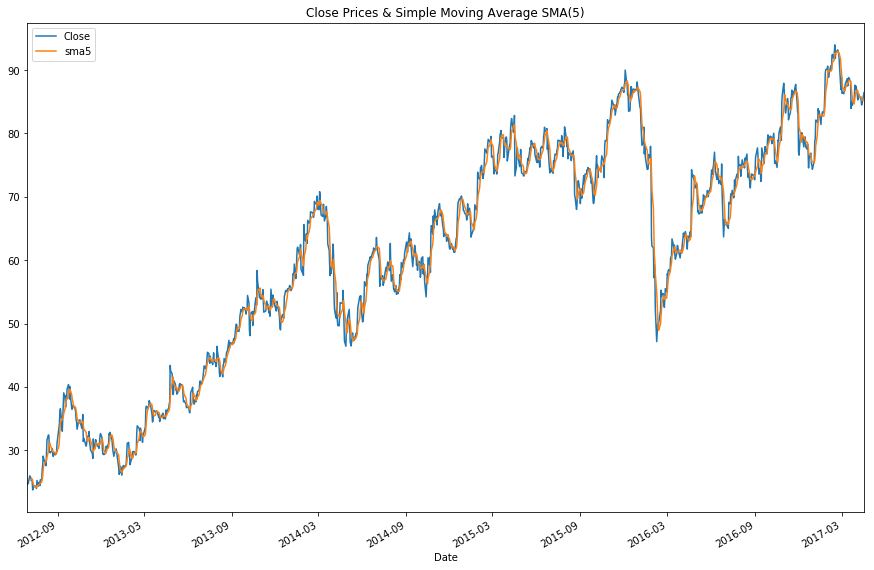

In [5]:
# SMA
aapl['sma5'] = ta.SMA(np.asarray(aapl['Close']), 5)

# TI Chart
aapl.plot(y=['Close', 'sma5'])
plt.title('Close Prices & Simple Moving Average SMA(5)')
plt.legend(loc='upper left')
plt.show()

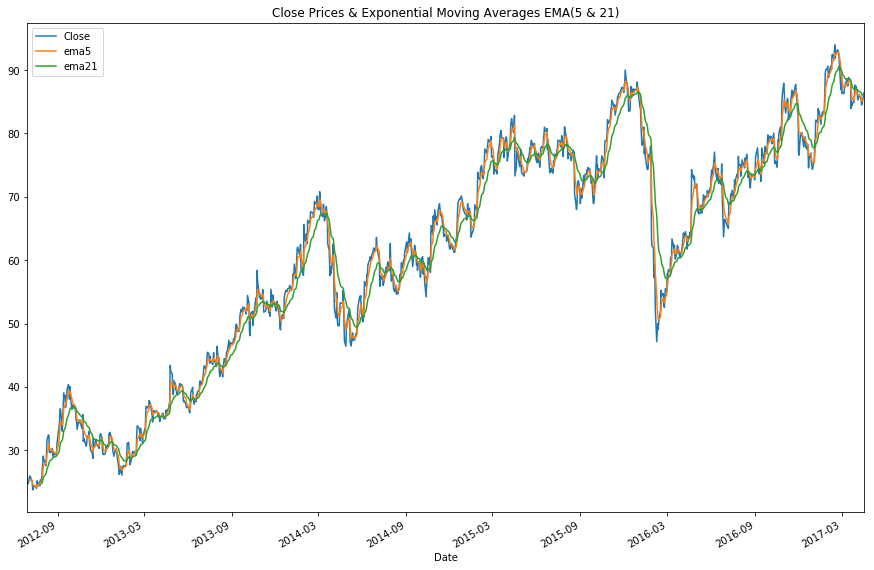

In [6]:
# EMA

# TI Calcs
aapl['ema5'] = ta.EMA(np.asarray(aapl['Close']), 5)
aapl['ema21'] = ta.EMA(np.asarray(aapl['Close']), 21)

# TI Chart
aapl.plot(y=['Close', 'ema5', 'ema21'])
plt.title('Close Prices & Exponential Moving Averages EMA(5 & 21)')
plt.legend(loc='upper left')
plt.show()

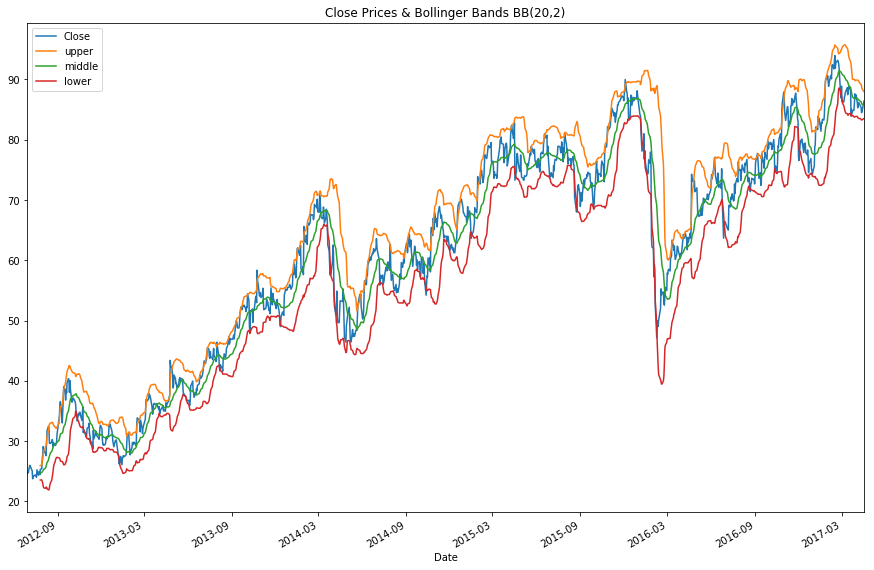

In [7]:
# BBANDS(20,2)

# TI Calc
aapl['upper'], aapl['middle'], aapl['lower'] = ta.BBANDS(np.asarray(aapl['Close']),
                                                     timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
# TI Chart
aapl.plot(y=['Close', 'upper', 'middle', 'lower'])
plt.title('Close Prices & Bollinger Bands BB(20,2)')
plt.legend(loc='upper left')
plt.show()


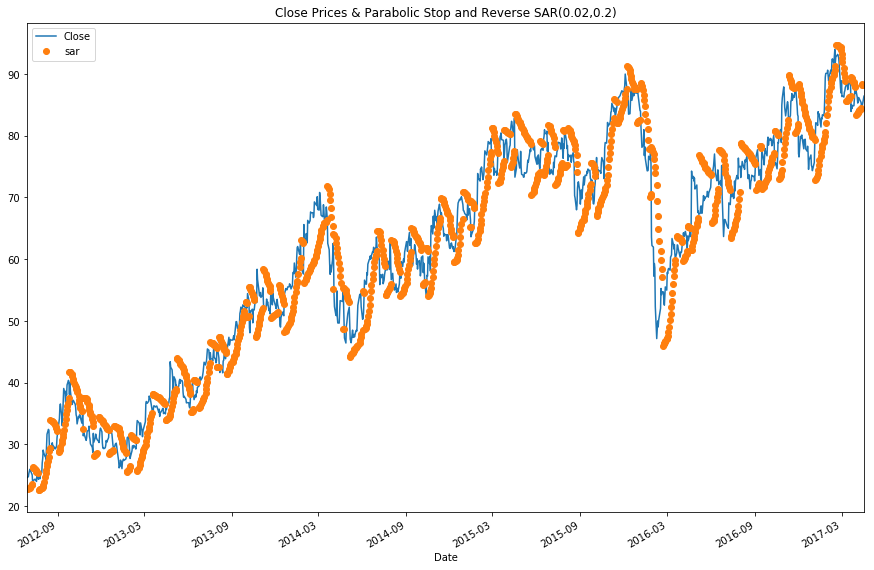

In [8]:
# SAR(0.02,0.2)

# 0.02 Acceleration Factor Increment
# 0.2 Maximum Acceleration Factor

# TI Calcs
aapl['sar'] = ta.SAR(np.asarray(aapl['High']), np.asarray(aapl['Low']), acceleration=0.02, maximum=0.2)

# TI Chart
_, ax = plt.subplots()
aapl.plot(y=['Close'], ax=ax)
aapl.plot(y=['sar'], marker='o', linestyle='', ax=ax)
plt.title('Close Prices & Parabolic Stop and Reverse SAR(0.02,0.2)')
plt.legend(loc='upper left')
plt.show()

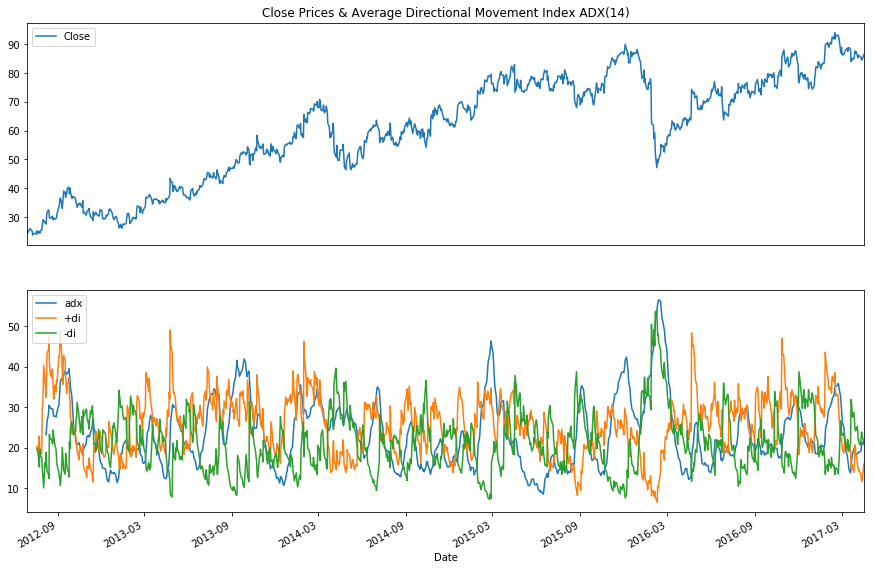

In [9]:
# TI Calc
aapl['adx'] = ta.ADX(np.asarray(aapl['High']), np.asarray(aapl['Low']), np.asarray(aapl['Close']), timeperiod=14)
aapl['+di'] = ta.PLUS_DI(np.asarray(aapl['High']), np.asarray(aapl['Low']), np.asarray(aapl['Close']), timeperiod=14)
aapl['-di'] = ta.MINUS_DI(np.asarray(aapl['High']), np.asarray(aapl['Low']), np.asarray(aapl['Close']), timeperiod=14)

# TI Chart
ax1 = plt.subplot(211)
plt.title('Close Prices & Average Directional Movement Index ADX(14)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(212)
aapl.plot(y=['adx', '+di', '-di'], ax=ax2)
plt.legend(loc='upper left')
plt.show()


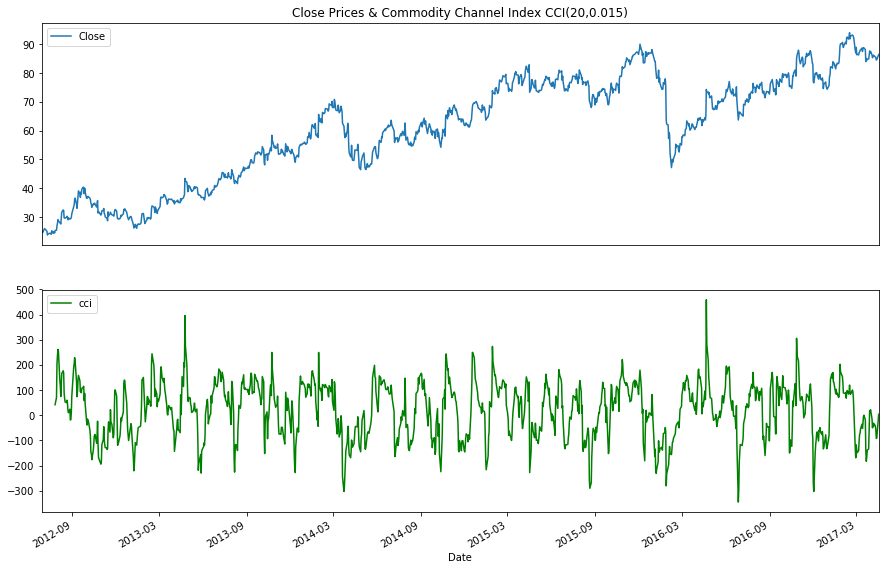

In [10]:
# CCI(20,0.015)

# TI Calcs
aapl['cci'] = ta.CCI(np.asarray(aapl['High']), np.asarray(aapl['Low']), np.asarray(aapl['Close']), timeperiod=20)
# TI Chart
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices & Commodity Channel Index CCI(20,0.015)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
aapl.plot(y=['cci'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.show()


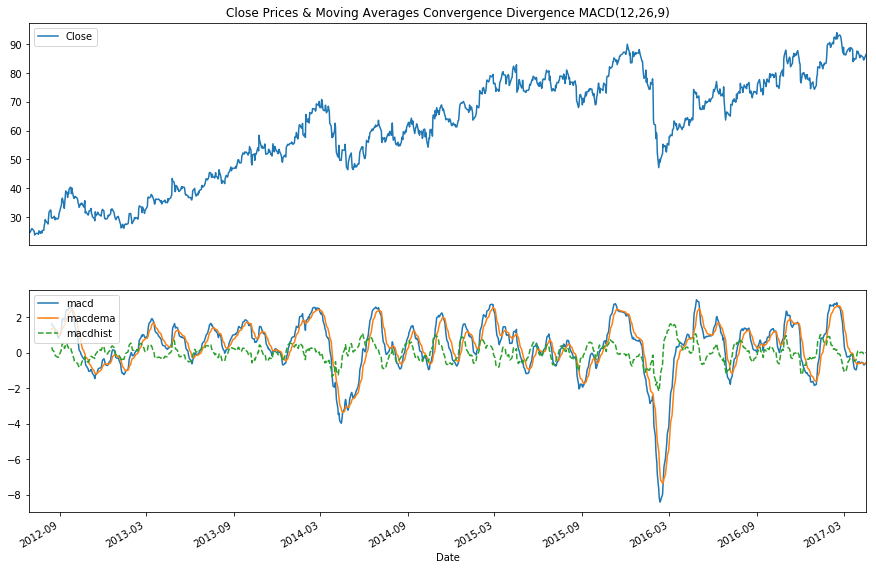

In [11]:
# MACD(12,26,9)

# TI Calcs
aapl['macd'], aapl['macdema'], aapl['macdhist'] = ta.MACD(np.asarray(aapl['Close']),
                                                      fastperiod=12, slowperiod=26, signalperiod=9)
# TI Charts
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices & Moving Averages Convergence Divergence MACD(12,26,9)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
aapl.plot(y=['macd', 'macdema'], ax=ax2)
aapl.plot(y=['macdhist'], linestyle='--', ax=ax2)
plt.legend(loc='upper left')
plt.show()


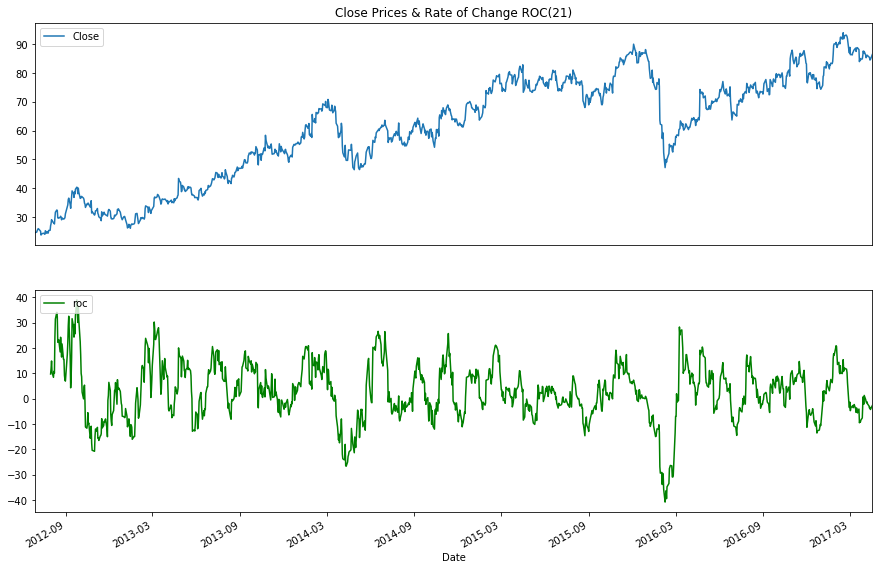

In [12]:
# ROC(21)

# TI Calcs
aapl['roc'] = ta.ROC(np.asarray(aapl['Close']), timeperiod=21)

# TI Chart
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices & Rate of Change ROC(21)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
aapl.plot(y=['roc'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.show()


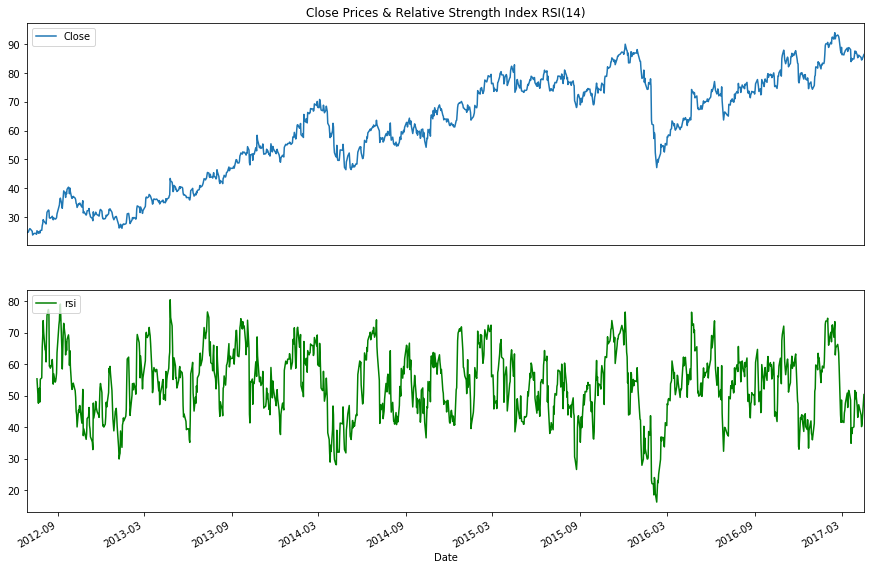

In [13]:
# RSI(14)
# TI Calcs
aapl['rsi'] = ta.RSI(np.asarray(aapl['Close']), timeperiod=14)

# TI Charts
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices & Relative Strength Index RSI(14)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
aapl.plot(y=['rsi'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.show()


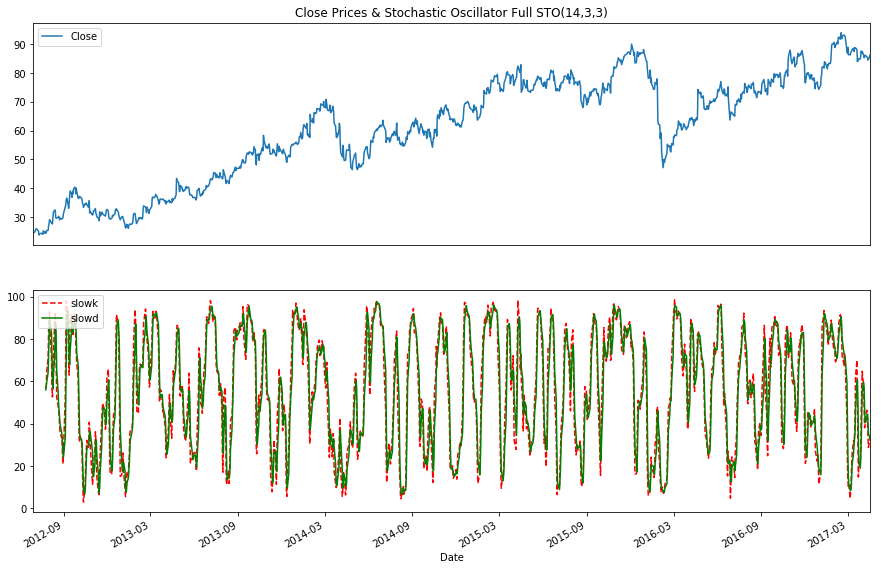

In [14]:
# STO(14,3,3)
# TI Calcs
aapl['slowk'], aapl['slowd'] = ta.STOCH(np.asarray(aapl['High']), np.asarray(aapl['Low']), np.asarray(aapl['Close']),
                                     fastk_period=14, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
# TI Charts
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices & Stochastic Oscillator Full STO(14,3,3)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
aapl.plot(y=['slowk'], color='r', linestyle='--', ax=ax2)
aapl.plot(y=['slowd'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.show()


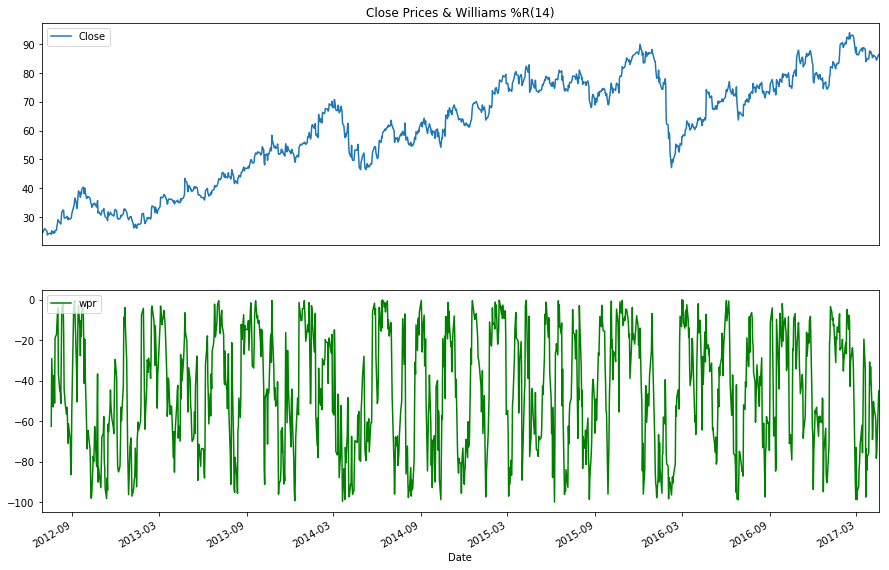

In [15]:
# Williams %R(14)

# TI Calcs
aapl['wpr'] = ta.WILLR(np.asarray(aapl['High']), np.asarray(aapl['Low']), np.asarray(aapl['Close']), timeperiod=14)

# TI Charts
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices & Williams %R(14)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
aapl.plot(y=['wpr'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.show()


In [16]:
# Price Crossover Trading Signals

In [17]:
# Previous Periods Data (avoid backtesting bias)
aapl['Close(-1)'] = aapl['Close'].shift(1)
aapl['sma5(-1)'] = aapl['sma5'].shift(1)
aapl['Close(-2)'] = aapl['Close'].shift(2)
aapl['sma5(-2)'] = aapl['sma5'].shift(2)

In [18]:
# Generate Trading Signals (buy=1 , sell=-1, do nothing=0)
aapl['sma5sig'] = 0
sma5sig = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['Close(-2)'] < r[1]['sma5(-2)'] and r[1]['Close(-1)'] > r[1]['sma5(-1)']:
        sma5sig = 1.0
    elif r[1]['Close(-2)'] > r[1]['sma5(-2)'] and r[1]['Close(-1)'] < r[1]['sma5(-1)']:
        sma5sig = -1.0
    else:
        sma5sig = 0.0
    aapl.ix[i, 'sma5sig'] = sma5sig

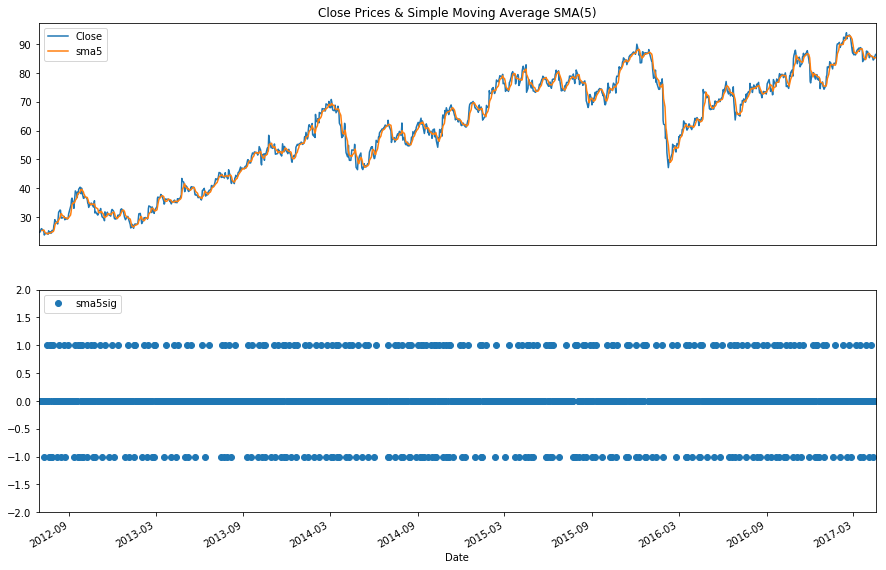

In [19]:
# TS Charts
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices & Simple Moving Average SMA(5)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close', 'sma5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
aapl.plot(y=['sma5sig'], marker='o', linestyle='', ax=ax2)
axes = plt.gca()
axes.set_ylim([-2,2])
plt.legend(loc='upper left')
plt.show()

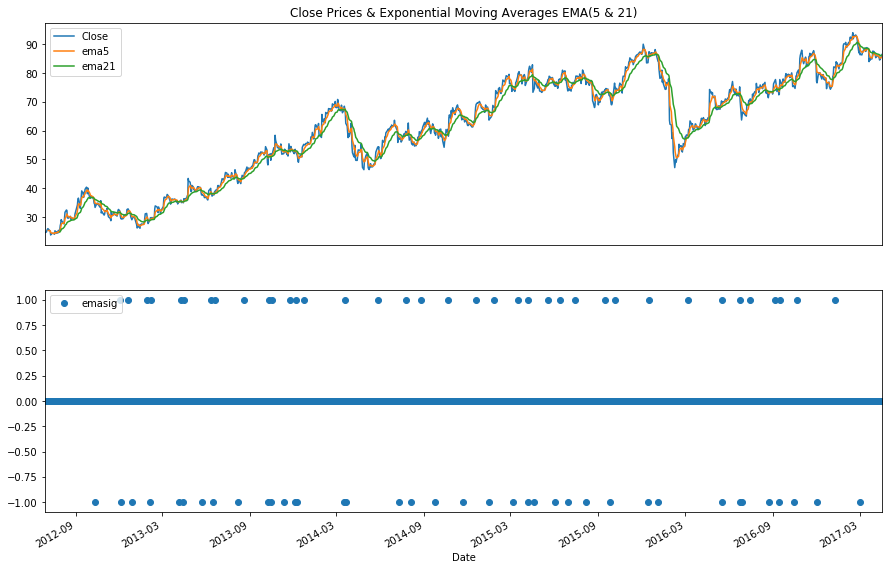

In [20]:
# Double Crossover Trading Signals

# Previous Periods Data (avoid back-testing bias)
aapl['ema5(-1)'] = aapl['ema5'].shift(1)
aapl['ema21(-1)'] = aapl['ema21'].shift(1)
aapl['ema5(-2)'] = aapl['ema5'].shift(2)
aapl['ema21(-2)'] = aapl['ema21'].shift(2)

# Generate Trading Signals (buy=1 , sell=-1, do nothing=0)
aapl['emasig'] = 0
emasig = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['ema5(-2)'] < r[1]['ema21(-2)'] and r[1]['ema5(-1)'] > r[1]['ema21(-1)']:
        emasig = 1
    elif r[1]['ema5(-2)'] > r[1]['ema21(-2)'] and r[1]['ema5(-1)'] < r[1]['ema21(-1)']:
        emasig = -1
    else:
        emasig = 0
    aapl.ix[i, 'emasig'] = emasig

# Trading Signals Chart
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices & Exponential Moving Averages EMA(5 & 21)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close', 'ema5', 'ema21'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
aapl.plot(y=['emasig'], marker='o', linestyle='', ax=ax2)
plt.legend(loc='upper left')
plt.show()


In [21]:
# Bollinger Bands Crossover Trading Signals

In [22]:
# Previous Periods Data (avoid back-testing bias)
# aapl['Close(-1)'] = aapl['Close'].shift(1)
aapl['lower(-1)'] = aapl['lower'].shift(1)
aapl['upper(-1)'] = aapl['upper'].shift(1)
# aapl['Close(-2)'] = aapl['Close'].shift(2)
aapl['lower(-2)'] = aapl['lower'].shift(2)
aapl['upper(-2)'] = aapl['upper'].shift(2)

In [23]:
# TS (buy=1 , sell=-1, do nothing=0)
aapl['bbsig'] = 0
bbsig = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['Close(-2)'] < r[1]['lower(-2)'] and r[1]['Close(-1)'] > r[1]['lower(-1)']:
        bbsig = 1
    elif r[1]['Close(-2)'] < r[1]['upper(-2)'] and r[1]['Close(-1)'] > r[1]['upper(-1)']:
        bbsig = -1
    else:
        bbsig = 0
    aapl.ix[i, 'bbsig'] = bbsig

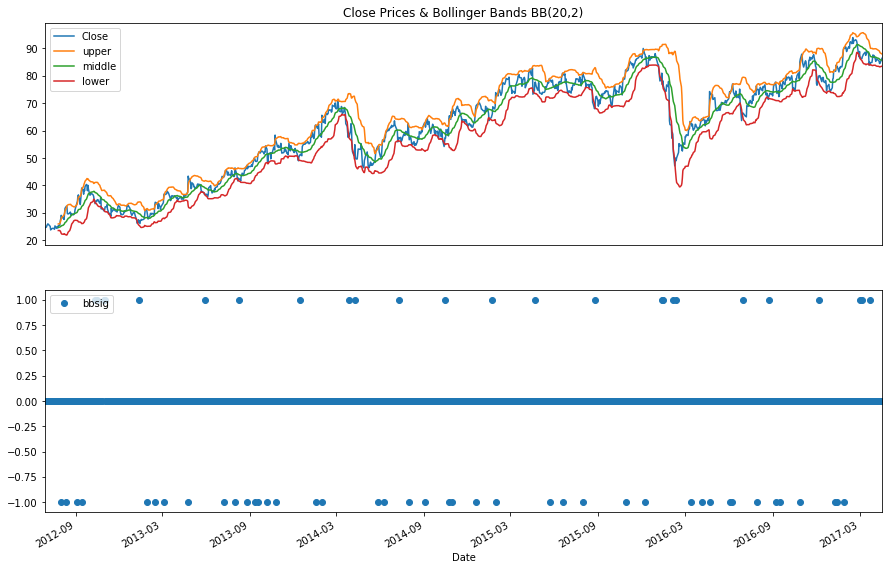

In [24]:
# TS Chart
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices & Bollinger Bands BB(20,2)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close', 'upper', 'middle', 'lower'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
aapl.plot(y=['bbsig'], marker='o', linestyle='', ax=ax2)
plt.legend(loc='upper left')
plt.show()

In [25]:
# SAR Trading Signals

In [26]:
# Previous Periods Data (avoid backtesting bias)
# aapl['Close(-1)'] = aapl['Close'].shift(1)
aapl['sar(-1)'] = aapl['sar'].shift(1)
# aapl['Close(-2)'] = aapl['Close'].shift(2)
aapl['sar(-2)'] = aapl['sar'].shift(2)

In [27]:
# TS (buy=1 , sell=-1, do nothing=0)
aapl['sarsig'] = 0
sarsig = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['Close(-2)'] < r[1]['sar(-2)'] and r[1]['Close(-1)'] > r[1]['sar(-1)']:
        sarsig = 1
    elif r[1]['Close(-2)'] > r[1]['sar(-2)'] and r[1]['Close(-1)'] < r[1]['sar(-1)']:
        sarsig = -1
    else:
        sarsig = 0
    aapl.ix[i, 'sarsig'] = sarsig

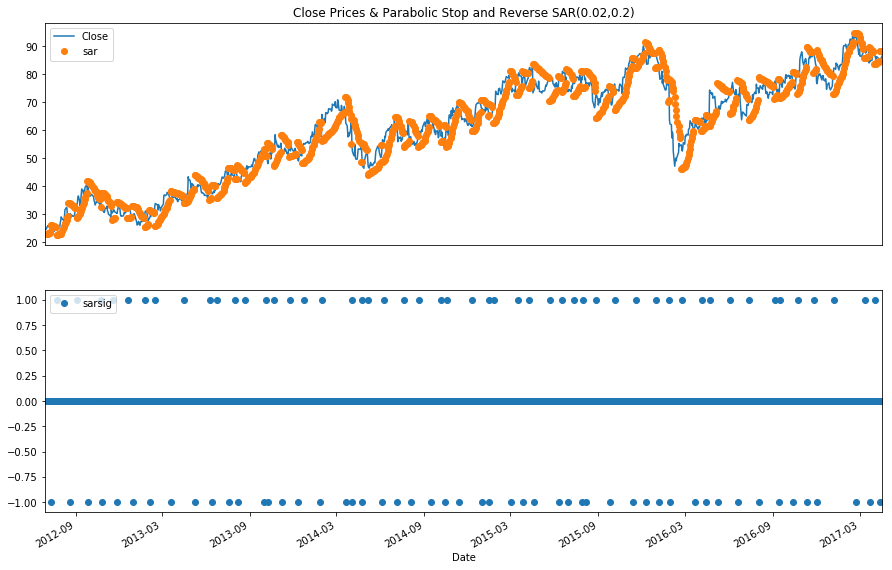

In [28]:
# TS Charts
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices & Parabolic Stop and Reverse SAR(0.02,0.2)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close'], ax=ax1)
aapl.plot(y=['sar'], marker='o', linestyle='', ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
aapl.plot(y=['sarsig'], marker='o', linestyle='', ax=ax2)
plt.legend(loc='upper left')
plt.show()

In [29]:
# Average Directional Movement Trade Signals

In [30]:
# Previous Periods Data (avoid back-testing bias)
aapl['adx(-1)'] = aapl['adx'].shift(1)
aapl['+di(-1)'] = aapl['+di'].shift(1)
aapl['-di(-1)'] = aapl['-di'].shift(1)
aapl['+di(-2)'] = aapl['+di'].shift(2)
aapl['-di(-2)'] = aapl['-di'].shift(2)

In [31]:
# Generate Trading Signals (buy=1 , sell=-1, do nothing=0)
aapl['adxsig'] = 0
adxsig = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['+di(-2)'] < r[1]['-di(-2)'] and r[1]['+di(-1)'] > r[1]['-di(-1)'] and r[1]['adx(-1)'] > 20:
        adxsig = 1
    elif r[1]['+di(-2)'] > r[1]['-di(-2)'] and r[1]['+di(-1)'] < r[1]['-di(-1)'] and r[1]['adx(-1)'] > 20:
        adxsig = -1
    else:
        adxsig = 0
    aapl.ix[i, 'adxsig'] = adxsig
    

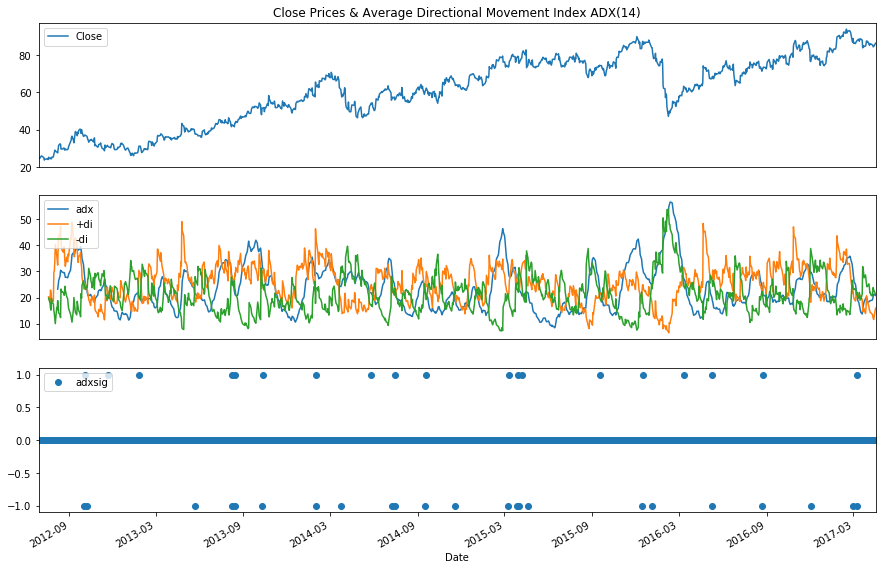

In [32]:
# Trading Signals Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices & Average Directional Movement Index ADX(14)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
aapl.plot(y=['adx', '+di', '-di'], ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
aapl.plot(y=['adxsig'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

In [33]:
# Bands Crossover TS

In [34]:
# Previous Periods Data (avoid back-testing bias)
aapl['cci(-1)'] = aapl['cci'].shift(1)
aapl['cci(-2)'] = aapl['cci'].shift(2)

In [35]:
# TS (buy=1 , sell=-1, do nothing=0)
aapl['ccisig'] = 0
ccisig = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['cci(-2)'] < -100 and r[1]['cci(-1)'] > -100:
        ccisig = 1
    elif r[1]['cci(-2)'] < 100 and r[1]['cci(-1)'] > 100:
        ccisig = -1
    else:
        ccisig = 0
    aapl.ix[i, 'ccisig'] = ccisig

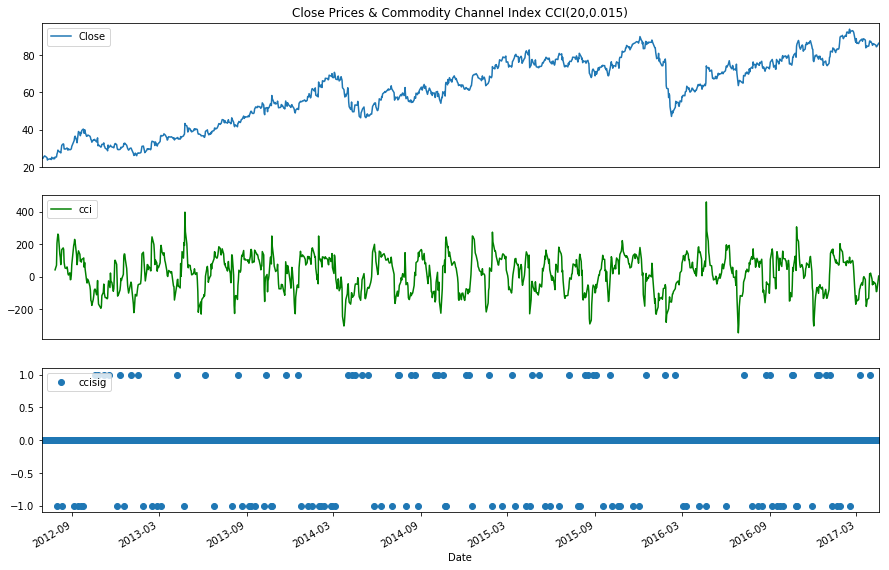

In [36]:
# Trading Signals Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices & Commodity Channel Index CCI(20,0.015)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
aapl.plot(y=['cci'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
aapl.plot(y=['ccisig'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

In [37]:
# MACD

In [38]:
aapl['macd(-1)'] = aapl['macd'].shift(1)
aapl['macdema(-1)'] = aapl['macdema'].shift(1)
aapl['macd(-2)'] = aapl['macd'].shift(2)
aapl['macdema(-2)'] = aapl['macdema'].shift(2)

In [39]:
# TS (buy=1 , sell=-1, do nothing=0)
aapl['macdsig'] = 0
macdsig = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['macd(-2)'] < r[1]['macdema(-2)'] and r[1]['macd(-1)'] > r[1]['macdema(-1)']:
        macdsig = 1
    elif r[1]['macd(-2)'] > r[1]['macdema(-2)'] and r[1]['macd(-1)'] < r[1]['macdema(-1)']:
        macdsig = -1
    else:
        macdsig = 0
    aapl.ix[i, 'macdsig'] = macdsig

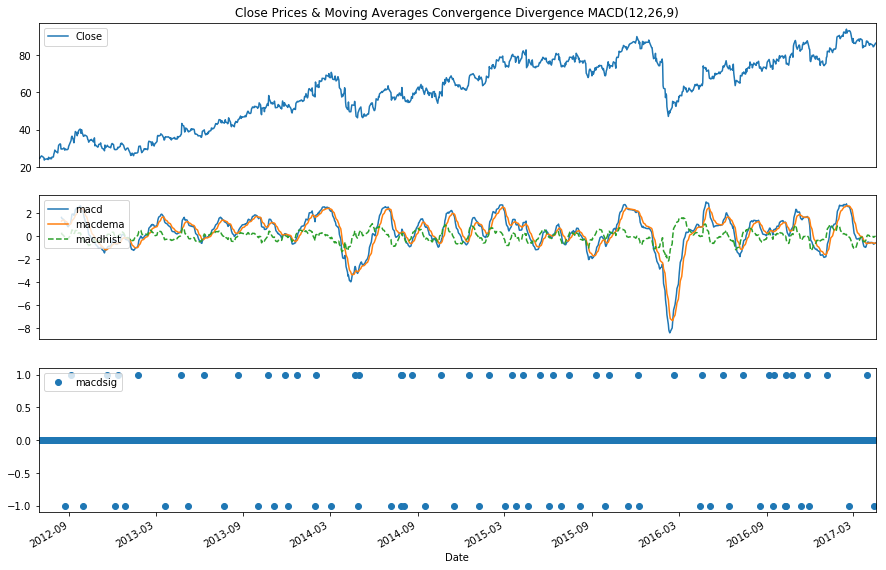

In [40]:
# TS Charts
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices & Moving Averages Convergence Divergence MACD(12,26,9)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
aapl.plot(y=['macd', 'macdema'], ax=ax2)
aapl.plot(y=['macdhist'], linestyle='--', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
aapl.plot(y=['macdsig'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

In [41]:
# ROC

In [42]:
aapl['roc(-1)'] = aapl['roc'].shift(1)
aapl['roc(-2)'] = aapl['roc'].shift(2)

In [43]:
# TS (buy=1 , sell=-1, do nothing=0)
aapl['rocsig'] = 0
rocsig = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['roc(-2)'] < -10 and r[1]['roc(-1)'] > -10:
        rocsig = 1
    elif r[1]['roc(-2)'] < 10 and r[1]['roc(-1)'] > 10:
        rocsig = -1
    else:
        rocsig = 0
    aapl.ix[i, 'rocsig'] = rocsig
    

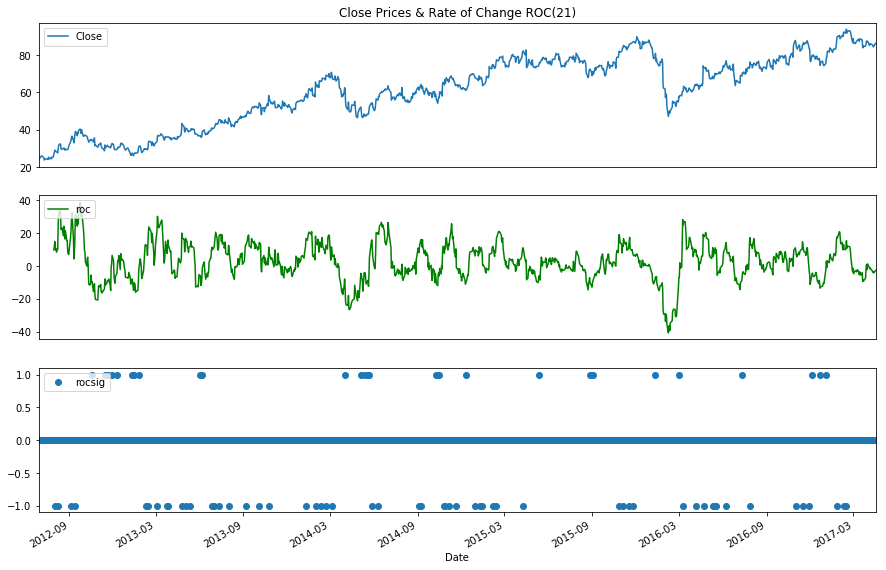

In [44]:
# TS Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices & Rate of Change ROC(21)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
aapl.plot(y=['roc'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
aapl.plot(y=['rocsig'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

In [45]:
# Relative Strength Trading Signal

In [46]:
aapl['rsi(-1)'] = aapl['rsi'].shift(1)
aapl['rsi(-2)'] = aapl['rsi'].shift(2)

In [47]:
# TS (buy=1 , sell=-1, do nothing=0)
aapl['rsisig'] = 0
rsisig = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['rsi(-2)'] < 30 and r[1]['rsi(-1)'] > 30:
        rsisig = 1
    elif r[1]['rsi(-2)'] < 70 and r[1]['rsi(-1)'] > 70:
        rsisig = -1
    else:
        rsisig = 0
    aapl.ix[i, 'rsisig'] = rsisig

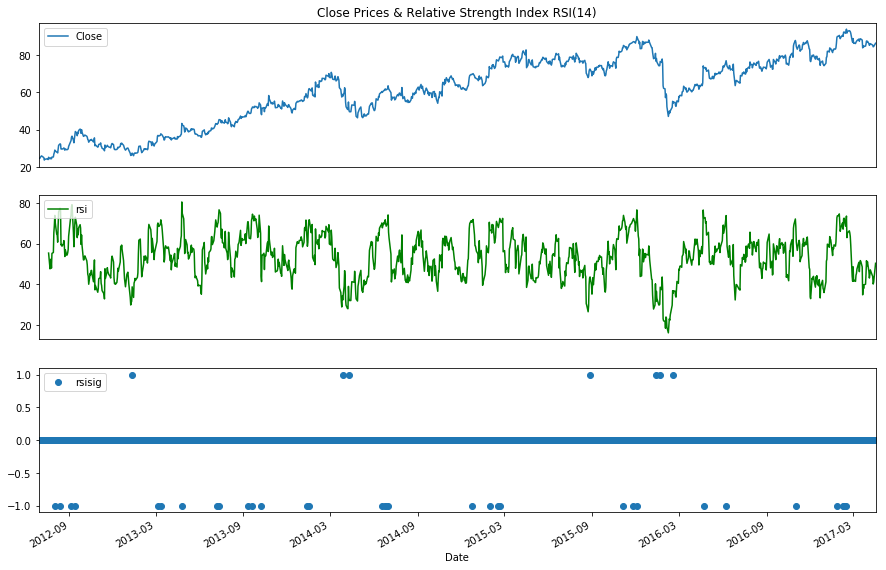

In [48]:
# TS Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices & Relative Strength Index RSI(14)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
aapl.plot(y=['rsi'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
aapl.plot(y=['rsisig'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

In [49]:
# Stochastic Oscillator Trading Signal

In [50]:
aapl['slowd(-1)'] = aapl['slowd'].shift(1)
aapl['slowd(-2)'] = aapl['slowd'].shift(2)

In [51]:
# TS (buy=1 , sell=-1, do nothing=0)
aapl['stosig'] = 0
stosig = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['slowd(-2)'] < 20 and r[1]['slowd(-1)'] > 20:
        stosig = 1
    elif r[1]['slowd(-2)'] < 80 and r[1]['slowd(-1)'] > 80:
        stosig = -1
    else:
        stosig = 0
    aapl.ix[i, 'stosig'] = stosig
    

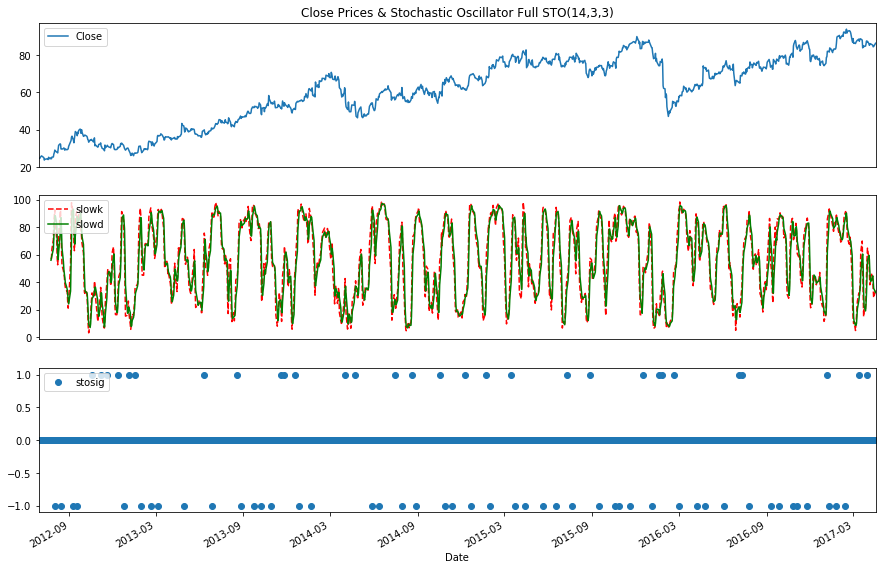

In [52]:
# TS Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices & Stochastic Oscillator Full STO(14,3,3)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
aapl.plot(y=['slowk'], color='r', linestyle='--', ax=ax2)
aapl.plot(y=['slowd'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
aapl.plot(y=['stosig'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

In [53]:
# William %R Trading Signal

In [54]:
aapl['wpr(-1)'] = aapl['wpr'].shift(1)
aapl['wpr(-2)'] = aapl['wpr'].shift(2)

In [55]:
# TS (buy=1 , sell=-1, do nothing=0)
aapl['wprsig'] = 0
wprsig = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['wpr(-2)'] < -80 and r[1]['wpr(-1)'] > -80:
        wprsig = 1
    elif r[1]['wpr(-2)'] < -20 and r[1]['wpr(-1)'] > -20:
        wprsig = -1
    else:
        wprsig = 0
    aapl.ix[i, 'wprsig'] = wprsig

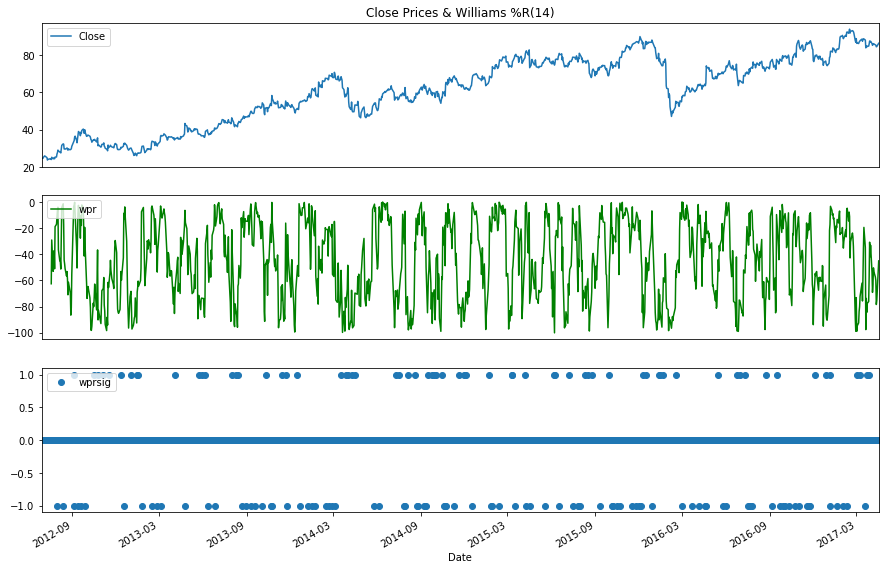

In [56]:
# TS Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices & Williams %R(14)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
aapl.plot(y=['wpr'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
aapl.plot(y=['wprsig'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

In [57]:
# SMA(5) and CCI(20,0.015)

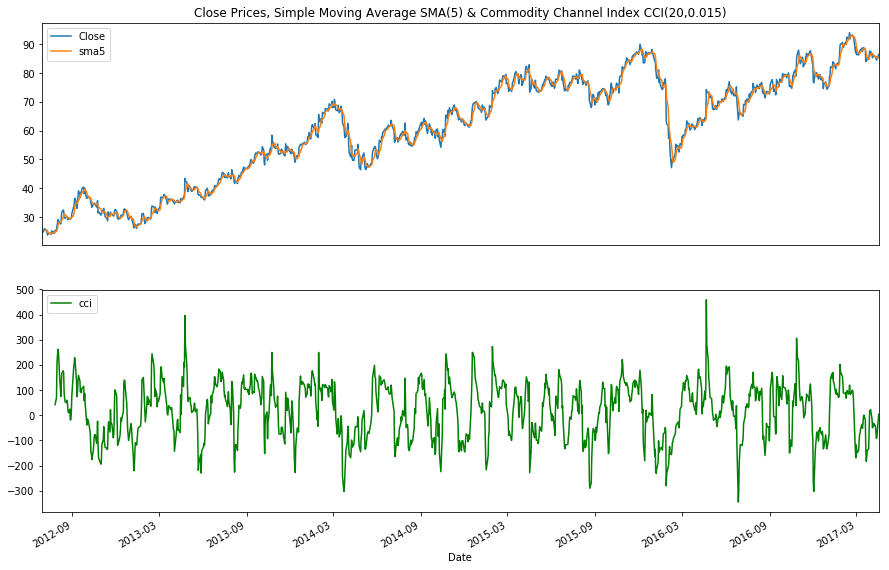

In [58]:
# TI Chart
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices, Simple Moving Average SMA(5) & Commodity Channel Index CCI(20,0.015)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close', 'sma5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
aapl.plot(y=['cci'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.show()

In [59]:
# aapl['Close(-1)'] = aapl['Close'].shift(1)
# aapl['sma5(-1)'] = aapl['sma5'].shift(1)
# aapl['cci(-1)'] = aapl['cci'].shift(1)
# aapl['Close(-2)'] = aapl['Close'].shift(2)
# aapl['sma5(-2)'] = aapl['sma5'].shift(2)

# TS (buy=1 , sell=-1, do nothing=0)
aapl['ccismasig'] = 0
ccismasig = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['Close(-2)'] < r[1]['sma5(-2)'] and r[1]['Close(-1)'] > r[1]['sma5(-1)'] and r[1]['cci(-1)'] < -100:
        ccismasig = 1
    elif r[1]['Close(-2)'] > r[1]['sma5(-2)'] and r[1]['Close(-1)'] < r[1]['sma5(-1)'] and r[1]['cci(-1)'] > 100:
        ccismasig = -1
    else:
        ccismasig = 0
    aapl.ix[i, 'ccismasig'] = ccismasig
    

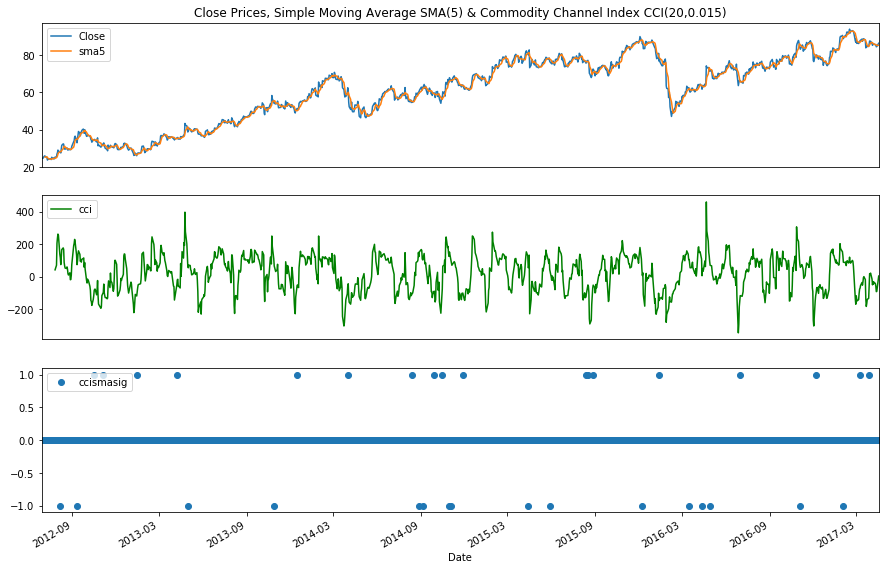

In [60]:
# TS Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices, Simple Moving Average SMA(5) & Commodity Channel Index CCI(20,0.015)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close', 'sma5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
aapl.plot(y=['cci'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
aapl.plot(y=['ccismasig'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

In [61]:
# SMA(5) and ROC(21)

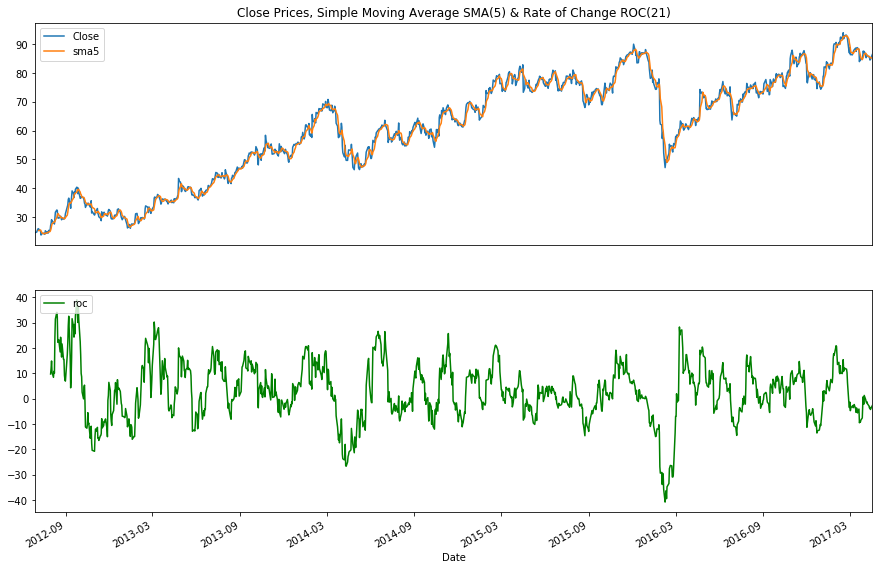

In [62]:
# TI Chart
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices, Simple Moving Average SMA(5) & Rate of Change ROC(21)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close', 'sma5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
aapl.plot(y=['roc'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.show()

In [63]:
# TS (buy=1 , sell=-1, do nothing=0)
aapl['rocsmasig'] = 0
rocsmasig = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['Close(-2)'] < r[1]['sma5(-2)'] and r[1]['Close(-1)'] > r[1]['sma5(-1)'] and r[1]['roc(-1)'] < -10:
        rocsmasig = 1
    elif r[1]['Close(-2)'] > r[1]['sma5(-2)'] and r[1]['Close(-1)'] < r[1]['sma5(-1)'] and r[1]['roc(-1)'] > 10:
        rocsmasig = -1
    else:
        rocsmasig = 0
    aapl.ix[i, 'rocsmasig'] = rocsmasig

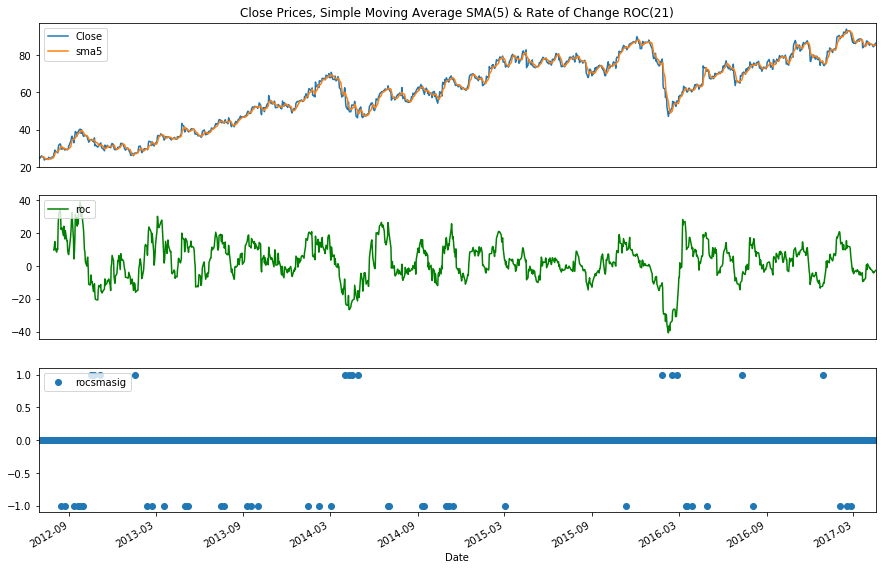

In [64]:
# TS Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices, Simple Moving Average SMA(5) & Rate of Change ROC(21)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close', 'sma5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
aapl.plot(y=['roc'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
aapl.plot(y=['rocsmasig'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

In [65]:
# SMA(5) and RSI(14)

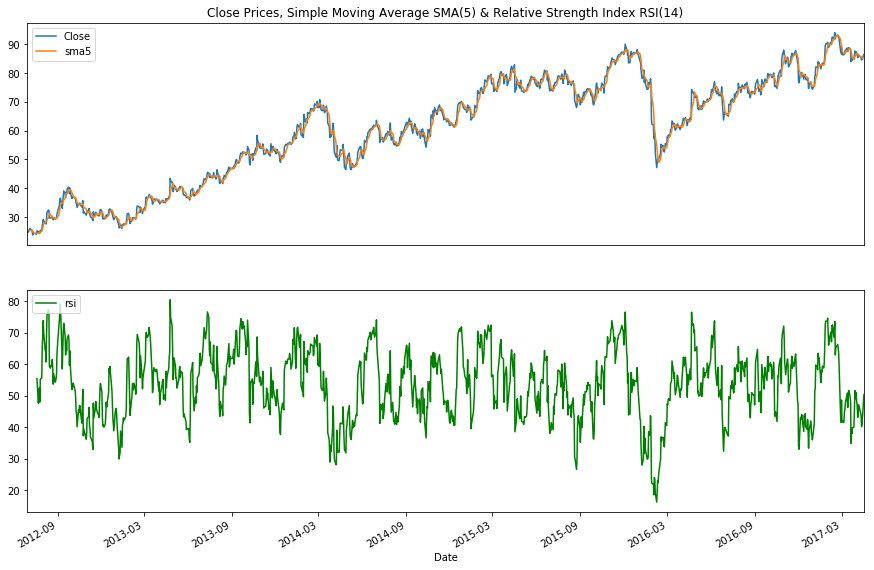

In [66]:
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices, Simple Moving Average SMA(5) & Relative Strength Index RSI(14)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close', 'sma5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
aapl.plot(y=['rsi'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.show()

In [67]:
# TS (buy=1 , sell=-1, do nothing=0)
aapl['rsismasig'] = 0
rsismasig = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['Close(-2)'] < r[1]['sma5(-2)'] and r[1]['Close(-1)'] > r[1]['sma5(-1)'] and r[1]['rsi(-1)'] < 30:
        rsismasig = 1
    elif r[1]['Close(-2)'] > r[1]['sma5(-2)'] and r[1]['Close(-1)'] < r[1]['sma5(-1)'] and r[1]['rsi(-1)'] > 70:
        rsismasig = -1
    else:
        rsismasig = 0
    aapl.ix[i, 'rsismasig'] = rsismasig
    

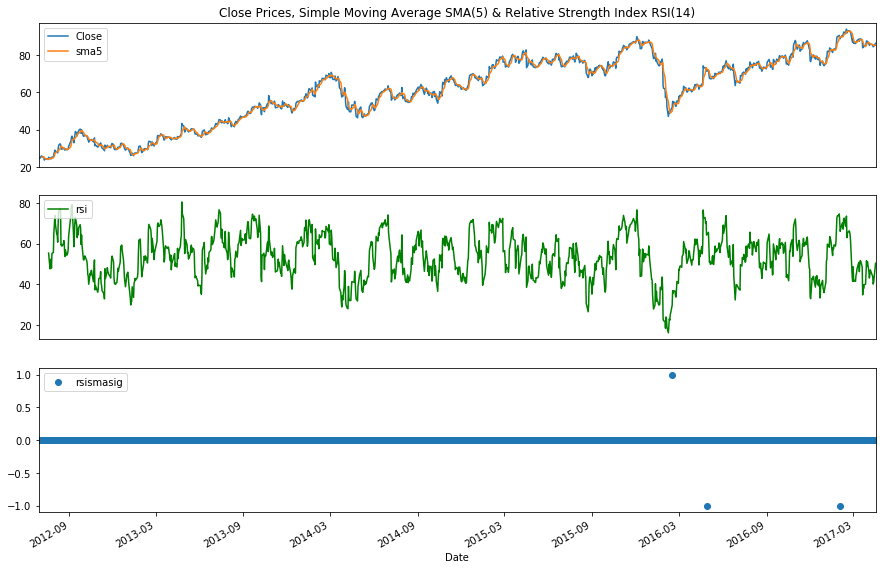

In [68]:
# TS Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices, Simple Moving Average SMA(5) & Relative Strength Index RSI(14)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close', 'sma5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
aapl.plot(y=['rsi'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
aapl.plot(y=['rsismasig'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

In [69]:
# SMA(5) and STO(14,3,3)

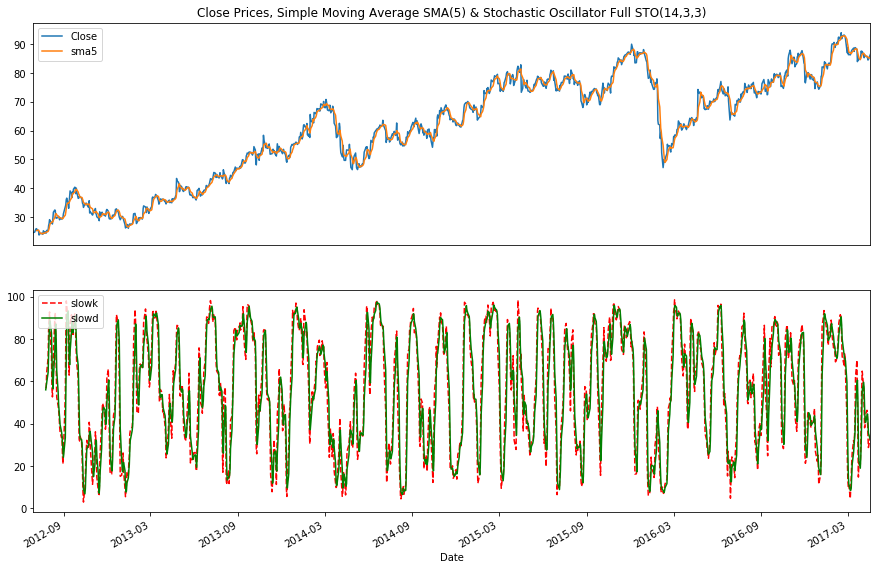

In [70]:
# TI Chart
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices, Simple Moving Average SMA(5) & Stochastic Oscillator Full STO(14,3,3)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close', 'sma5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
aapl.plot(y=['slowk'], color='r', linestyle='--', ax=ax2)
aapl.plot(y=['slowd'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.show()

In [71]:
# TS (buy=1 , sell=-1, do nothing=0)
aapl['stosmasig'] = 0
stosmasig = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['Close(-2)'] < r[1]['sma5(-2)'] and r[1]['Close(-1)'] > r[1]['sma5(-1)'] and r[1]['slowd(-1)'] < 20:
        stosmasig = 1
    elif r[1]['Close(-2)'] > r[1]['sma5(-2)'] and r[1]['Close(-1)'] < r[1]['sma5(-1)'] and r[1]['slowd(-1)'] > 80:
        stosmasig = -1
    else:
        stosmasig = 0
    aapl.ix[i, 'stosmasig'] = stosmasig
    

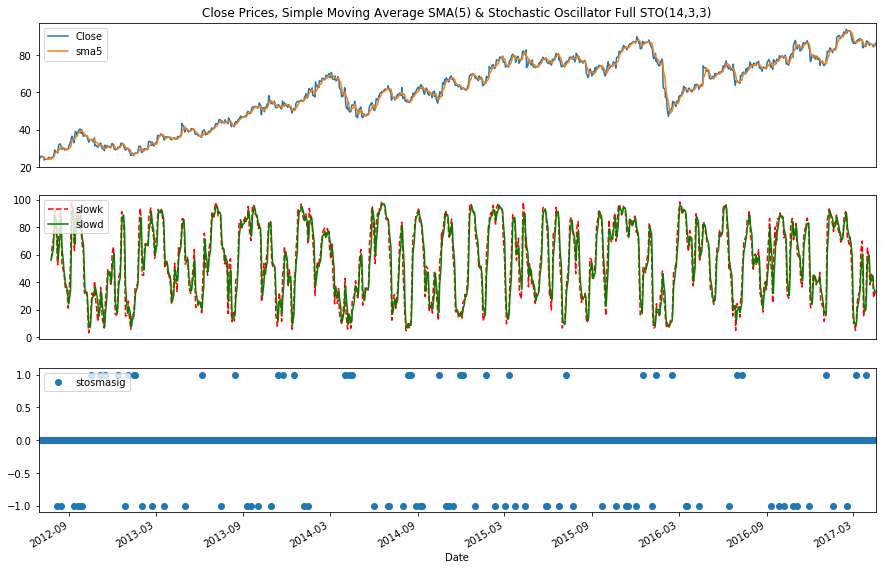

In [72]:
# TS Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices, Simple Moving Average SMA(5) & Stochastic Oscillator Full STO(14,3,3)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close', 'sma5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
aapl.plot(y=['slowk'], color='r', linestyle='--', ax=ax2)
aapl.plot(y=['slowd'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
aapl.plot(y=['stosmasig'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

In [73]:
# SMA(5) and Williams %R(14)

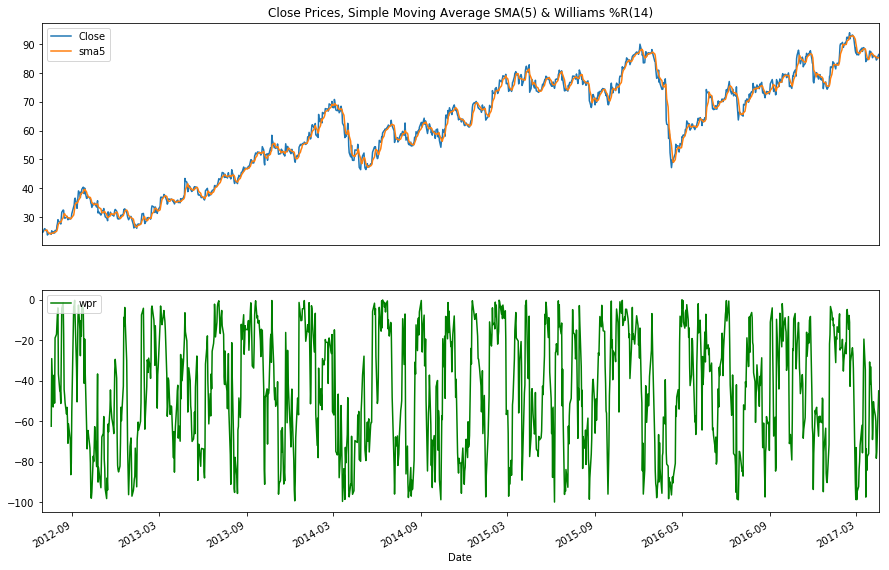

In [74]:
# TI Chart
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices, Simple Moving Average SMA(5) & Williams %R(14)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close', 'sma5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
aapl.plot(y=['wpr'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.show()

In [75]:
# TS (buy=1 , sell=-1, do nothing=0)
aapl['wprsmasig'] = 0
wprsmasig = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['Close(-2)'] < r[1]['sma5(-2)'] and r[1]['Close(-1)'] > r[1]['sma5(-1)'] and r[1]['wpr(-1)'] < -80:
        wprsmasig = 1
    elif r[1]['Close(-2)'] > r[1]['sma5(-2)'] and r[1]['Close(-1)'] < r[1]['sma5(-1)'] and r[1]['wpr(-1)'] > -20:
        wprsmasig = -1
    else:
        wprsmasig = 0
    aapl.ix[i, 'wprsmasig'] = wprsmasig    

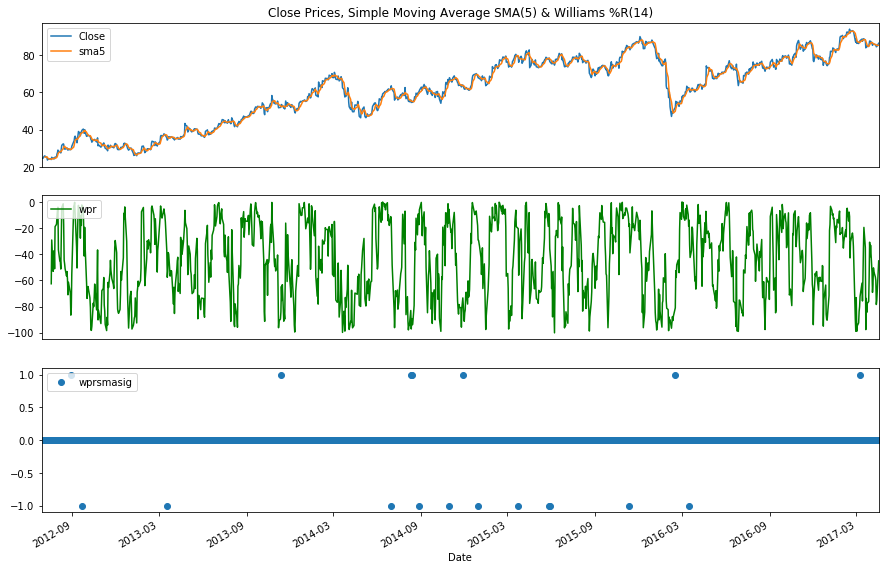

In [76]:
# TS Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices, Simple Moving Average SMA(5) & Williams %R(14)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close', 'sma5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
aapl.plot(y=['wpr'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
aapl.plot(y=['wprsmasig'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

In [77]:
# Strategy

In [78]:
# Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
aapl['sma5str'] = 1
sma5str = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['sma5sig'] == 1:
        sma5str = 1
    elif r[1]['sma5sig'] == -1:
        sma5str = 0
    else:
        sma5str = aapl['sma5str'][i-1]
    aapl.ix[i, 'sma5str'] = sma5str

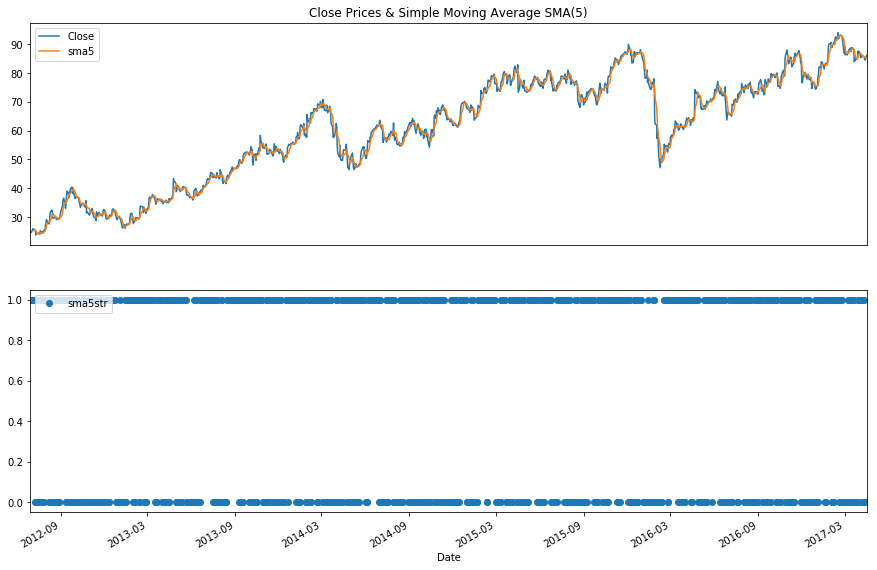

In [79]:
# TS Chart
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices & Simple Moving Average SMA(5)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close', 'sma5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
aapl.plot(y=['sma5str'], marker='o', linestyle='', ax=ax2)
plt.legend(loc='upper left')
plt.show()

In [80]:
# Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
aapl['emastr'] = 1
emastr = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['emasig'] == 1:
        emastr = 1
    elif r[1]['emasig'] == -1:
        emastr = 0
    else:
        emastr = aapl['emastr'][i-1]
    aapl.ix[i, 'emastr'] = emastr    

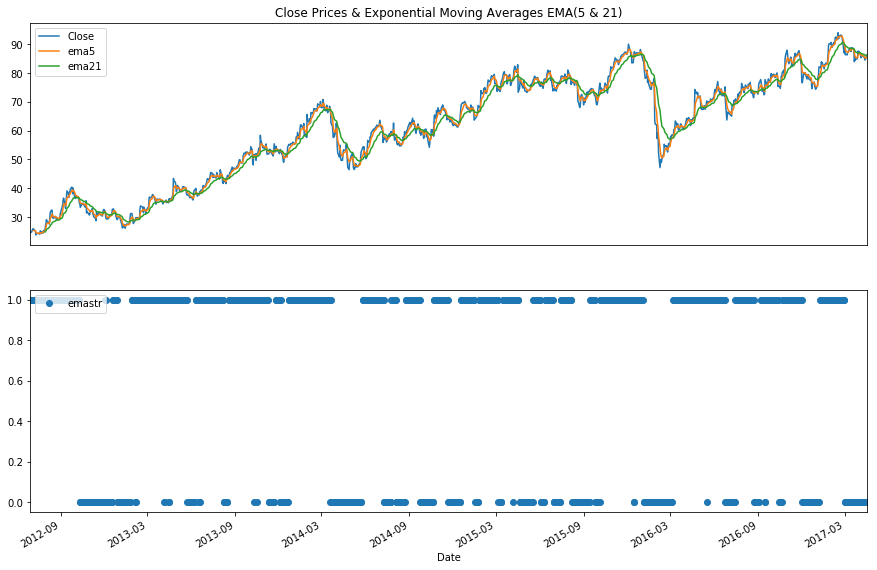

In [81]:
# TS Chart
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices & Exponential Moving Averages EMA(5 & 21)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close', 'ema5', 'ema21'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
aapl.plot(y=['emastr'], marker='o', linestyle='', ax=ax2)
plt.legend(loc='upper left')
plt.show()

In [82]:
# Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
aapl['bbstr'] = 1
bbstr = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['bbsig'] == 1:
        bbstr = 1
    elif r[1]['bbsig'] == -1:
        bbstr = 0
    else:
        bbstr = aapl['bbstr'][i-1]
    aapl.ix[i, 'bbstr'] = bbstr    

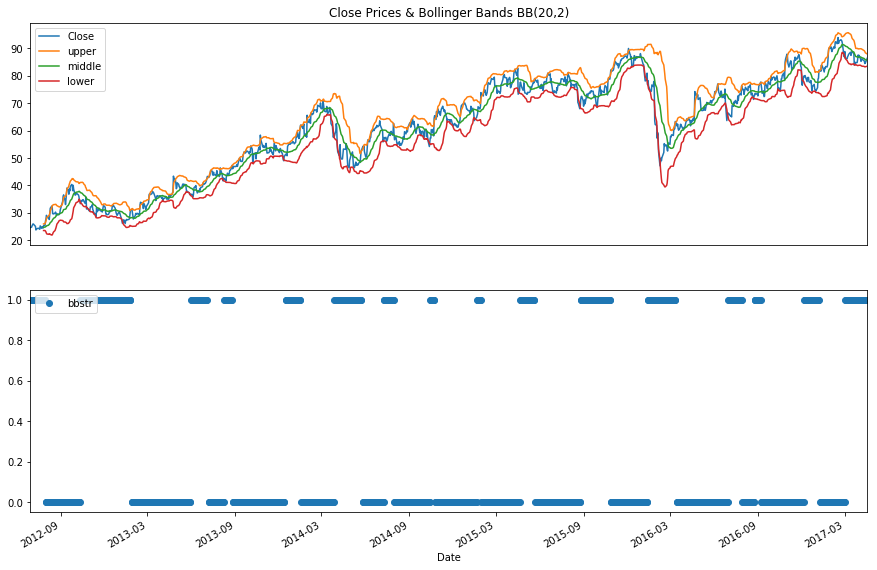

In [83]:
# Trading Strategy Chart
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices & Bollinger Bands BB(20,2)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close', 'upper', 'middle', 'lower'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
aapl.plot(y=['bbstr'], marker='o', linestyle='', ax=ax2)
plt.legend(loc='upper left')
plt.show()

In [84]:
# Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
aapl['sarstr'] = 1
sarstr = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['sarsig'] == 1:
        sarstr = 1
    elif r[1]['sarsig'] == -1:
        sarstr = 0
    else:
        sarstr = aapl['sarstr'][i-1]
    aapl.ix[i, 'sarstr'] = sarstr    

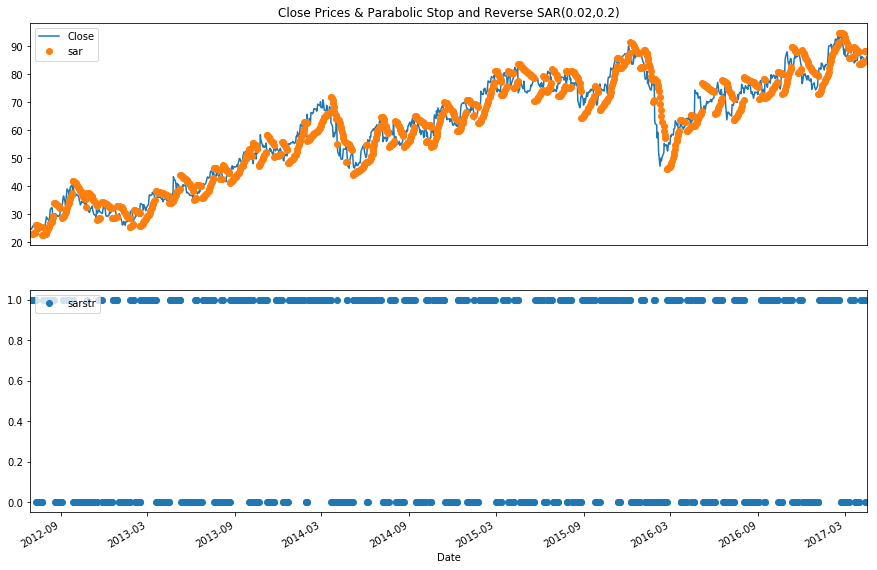

In [85]:
# Trading Strategy Chart
ax1 = plt.subplot(2, 1, 1)
plt.title('Close Prices & Parabolic Stop and Reverse SAR(0.02,0.2)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close'], ax=ax1)
aapl.plot(y=['sar'], marker='o', linestyle='', ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(2, 1, 2)
aapl.plot(y=['sarstr'], marker='o', linestyle='', ax=ax2)
plt.legend(loc='upper left')
plt.show()

In [86]:
# Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
aapl['adxstr'] = 1
adxstr = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['adxsig'] == 1:
        adxstr = 1
    elif r[1]['adxsig'] == -1:
        adxstr = 0
    else:
        adxstr = aapl['adxstr'][i-1]
    aapl.ix[i, 'adxstr'] = adxstr

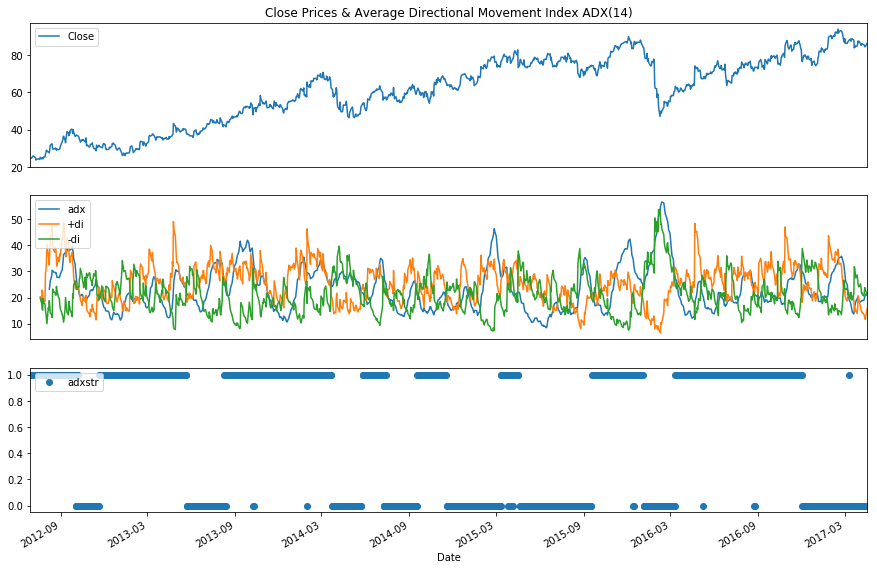

In [87]:
# Trading Strategy Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices & Average Directional Movement Index ADX(14)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
aapl.plot(y=['adx', '+di', '-di'], ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
aapl.plot(y=['adxstr'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

In [88]:
# Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
aapl['ccistr'] = 1
ccistr = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['ccisig'] == 1:
        ccistr = 1
    elif r[1]['ccisig'] == -1:
        ccistr = 0
    else:
        ccistr = aapl['ccistr'][i-1]
    aapl.ix[i, 'ccistr'] = ccistr

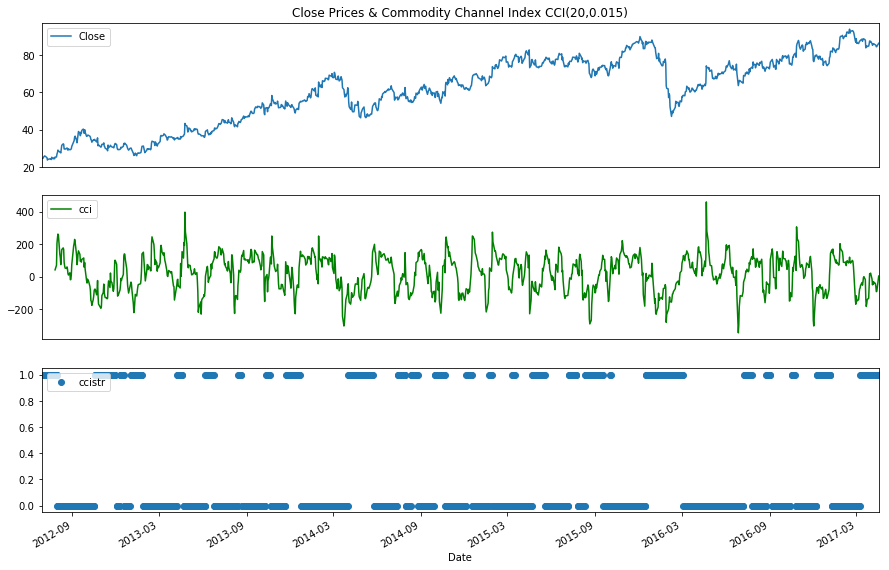

In [89]:
# Trading Strategy Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices & Commodity Channel Index CCI(20,0.015)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
aapl.plot(y=['cci'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
aapl.plot(y=['ccistr'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

In [90]:
# Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
aapl['macdstr'] = 1
macdstr = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['macdsig'] == 1:
        macdstr = 1
    elif r[1]['macdsig'] == -1:
        macdstr = 0
    else:
        macdstr = aapl['macdstr'][i-1]
    aapl.ix[i, 'macdstr'] = macdstr

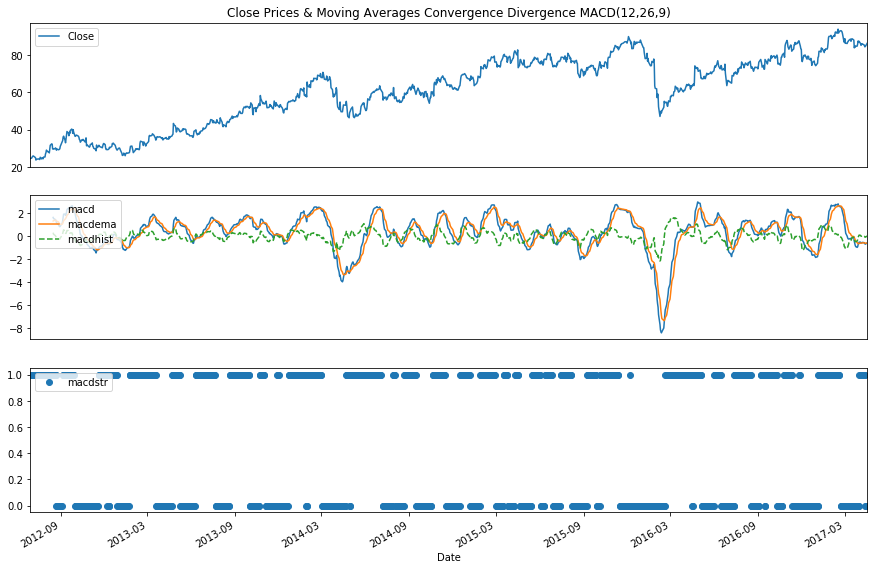

In [91]:
# Trading Strategy Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices & Moving Averages Convergence Divergence MACD(12,26,9)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
aapl.plot(y=['macd', 'macdema'], ax=ax2)
aapl.plot(y=['macdhist'], linestyle='--', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
aapl.plot(y=['macdstr'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

In [92]:
# Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
aapl['rocstr'] = 1
rocstr = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['rocsig'] == 1:
        rocstr = 1
    elif r[1]['rocsig'] == -1:
        rocstr = 0
    else:
        rocstr = aapl['rocstr'][i-1]
    aapl.ix[i, 'rocstr'] = rocstr

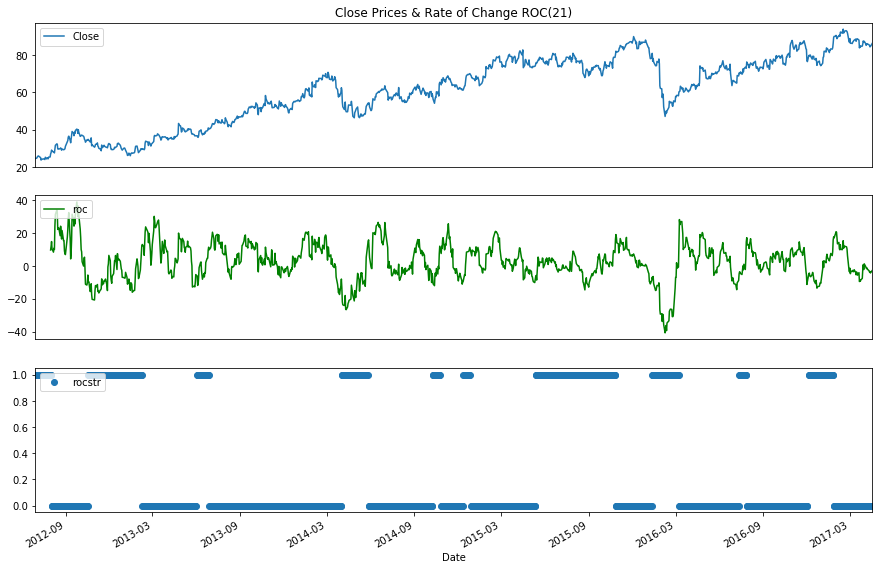

In [93]:
# Trading Strategy Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices & Rate of Change ROC(21)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
aapl.plot(y=['roc'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
aapl.plot(y=['rocstr'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

In [94]:
# Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
aapl['rsistr'] = 1
rsistr = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['rsisig'] == 1:
        rsistr = 1
    elif r[1]['rsisig'] == -1:
        rsistr = 0
    else:
        rsistr = aapl['rsistr'][i-1]
    aapl.ix[i, 'rsistr'] = rsistr

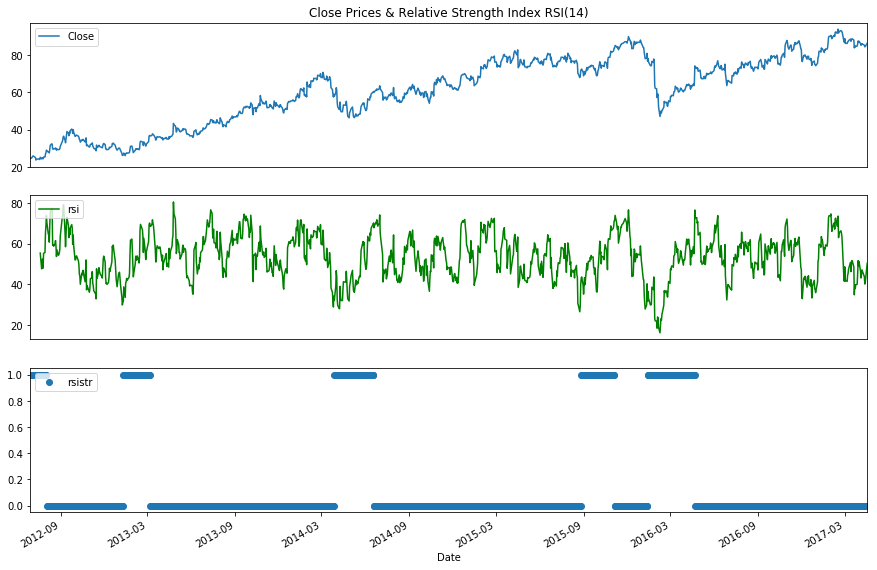

In [95]:
# Trading Strategy Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices & Relative Strength Index RSI(14)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
aapl.plot(y=['rsi'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
aapl.plot(y=['rsistr'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

In [96]:
# Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
aapl['stostr'] = 1
stostr = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['stosig'] == 1:
        stostr = 1
    elif r[1]['stosig'] == -1:
        stostr = 0
    else:
        stostr = aapl['stostr'][i-1]
    aapl.ix[i, 'stostr'] = stostr

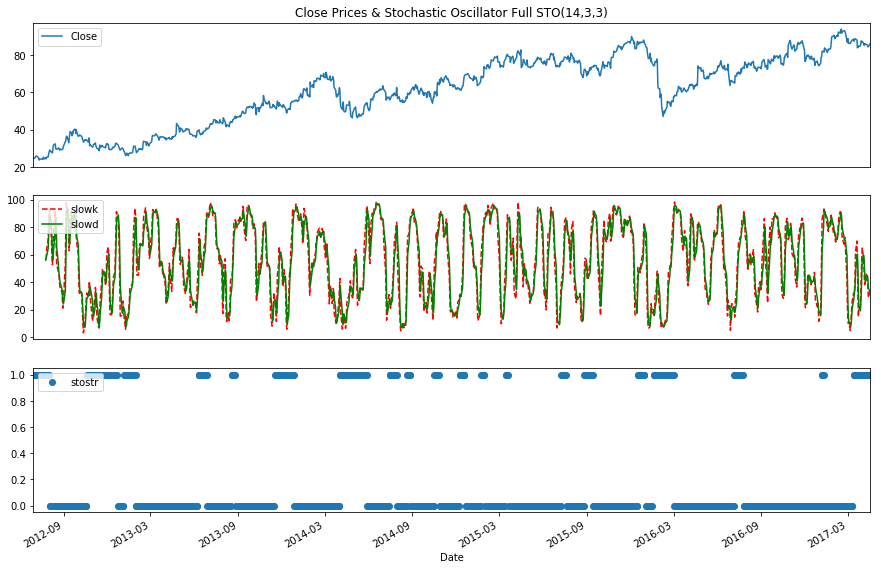

In [97]:
# Trading Strategy Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices & Stochastic Oscillator Full STO(14,3,3)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
aapl.plot(y=['slowk'], color='r', linestyle='--', ax=ax2)
aapl.plot(y=['slowd'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
aapl.plot(y=['stostr'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

In [98]:
# Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
aapl['wprstr'] = 1
wprstr = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['wprsig'] == 1:
        wprstr = 1
    elif r[1]['wprsig'] == -1:
        wprstr = 0
    else:
        wprstr = aapl['wprstr'][i-1]
    aapl.ix[i, 'wprstr'] = wprstr

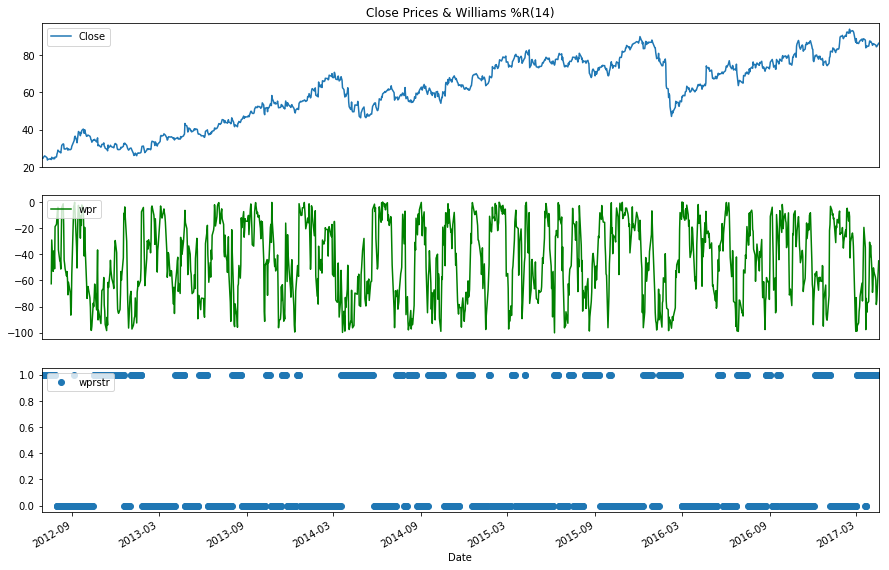

In [99]:
# Trading Strategy Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices & Williams %R(14)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
aapl.plot(y=['wpr'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
aapl.plot(y=['wprstr'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

In [100]:
# Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
aapl['ccismastr'] = 1
ccismastr = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['ccismasig'] == 1:
        ccismastr = 1
    elif r[1]['ccismasig'] == -1:
        ccismastr = 0
    else:
        ccismastr = aapl['ccismastr'][i-1]
    aapl.ix[i, 'ccismastr'] = ccismastr

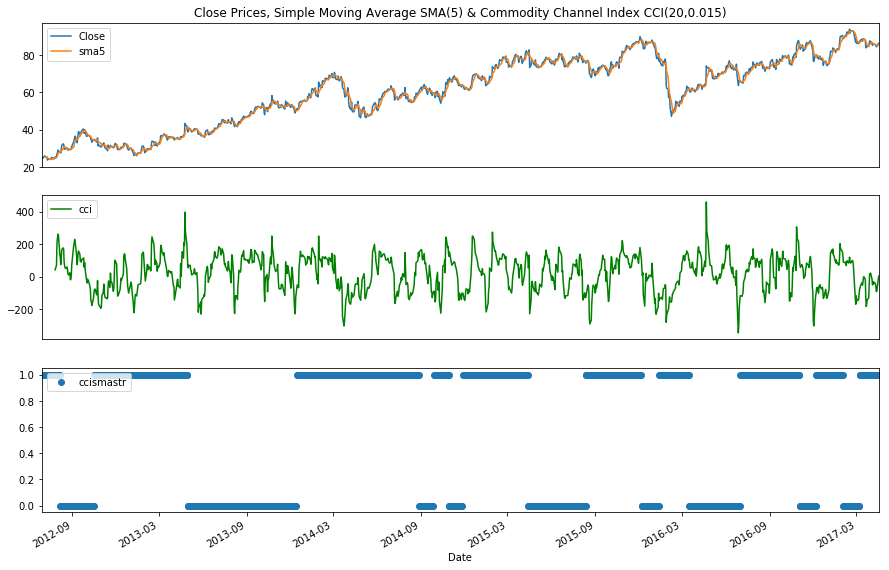

In [101]:
# Trading Strategy Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices, Simple Moving Average SMA(5) & Commodity Channel Index CCI(20,0.015)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close', 'sma5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
aapl.plot(y=['cci'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
aapl.plot(y=['ccismastr'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

In [102]:
# Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
aapl['rocsmastr'] = 1
rocsmastr = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['rocsmasig'] == 1:
        rocsmastr = 1
    elif r[1]['rocsmasig'] == -1:
        rocsmastr = 0
    else:
        rocsmastr = aapl['rocsmastr'][i-1]
    aapl.ix[i, 'rocsmastr'] = rocsmastr

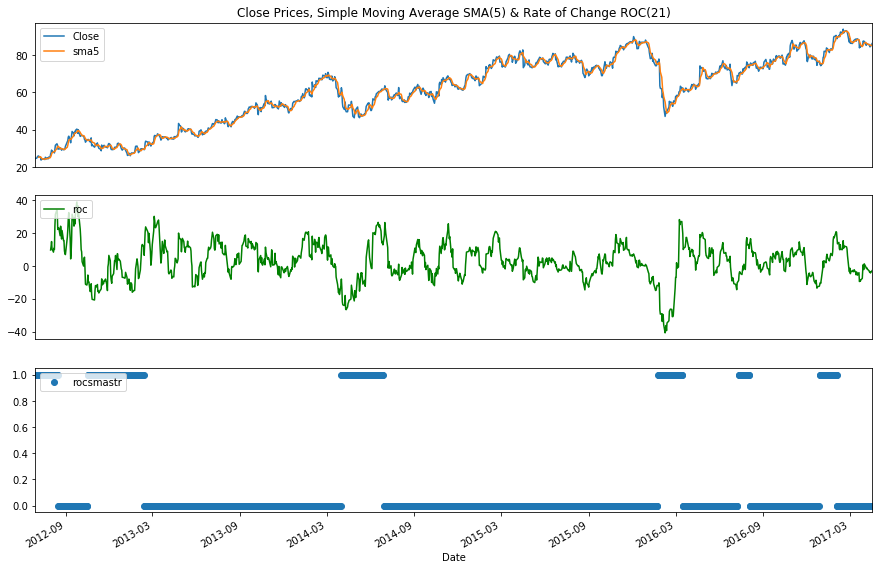

In [103]:
# Trading Strategy Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices, Simple Moving Average SMA(5) & Rate of Change ROC(21)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close', 'sma5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
aapl.plot(y=['roc'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
aapl.plot(y=['rocsmastr'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

In [104]:
# Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
aapl['rsismastr'] = 1
rsismastr = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['rsismasig'] == 1:
        rsismastr = 1
    elif r[1]['rsismasig'] == -1:
        rsismastr = 0
    else:
        rsismastr = aapl['rsismastr'][i-1]
    aapl.ix[i, 'rsismastr'] = rsismastr

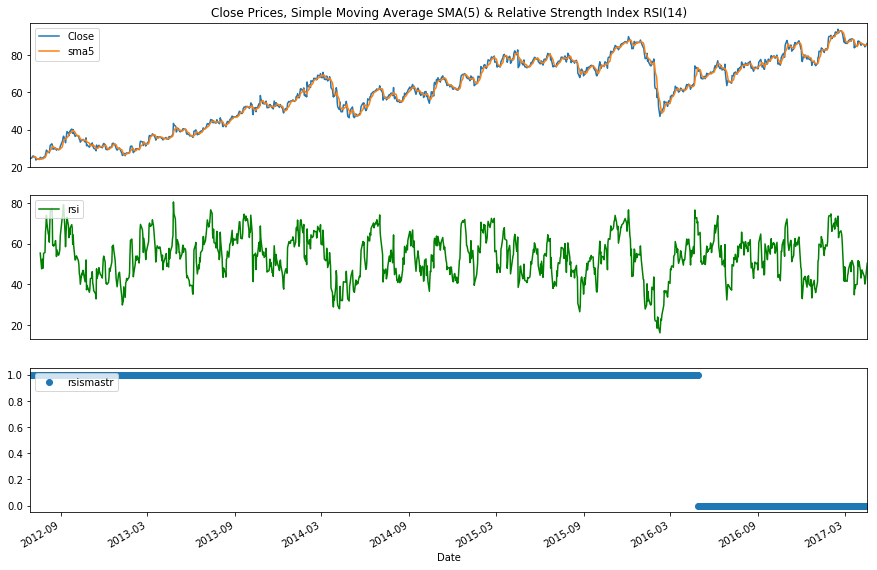

In [105]:
# Trading Strategy Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices, Simple Moving Average SMA(5) & Relative Strength Index RSI(14)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close', 'sma5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
aapl.plot(y=['rsi'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
aapl.plot(y=['rsismastr'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

In [106]:
# Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
aapl['stosmastr'] = 1
stosmastr = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['stosmasig'] == 1:
        stosmastr = 1
    elif r[1]['stosmasig'] == -1:
        stosmastr = 0
    else:
        stosmastr = aapl['stosmastr'][i-1]
    aapl.ix[i, 'stosmastr'] = stosmastr

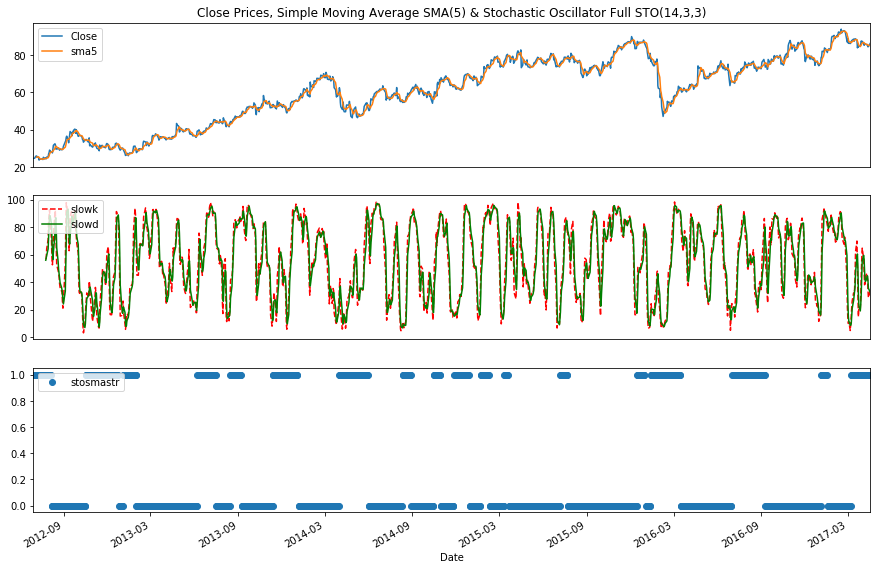

In [107]:
# Trading Strategy Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices, Simple Moving Average SMA(5) & Stochastic Oscillator Full STO(14,3,3)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close', 'sma5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
aapl.plot(y=['slowk'], color='r', linestyle='--', ax=ax2)
aapl.plot(y=['slowd'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
aapl.plot(y=['stosmastr'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

In [108]:
# Trading Strategy (own stock=1 , not own stock=0, short-selling not available)
aapl['wprsmastr'] = 1
wprsmastr = 0
for i, r in enumerate(aapl.iterrows()):
    if r[1]['wprsmasig'] == 1:
        wprsmastr = 1
    elif r[1]['wprsmasig'] == -1:
        wprsmastr = 0
    else:
        wprsmastr = aapl['wprsmastr'][i-1]
    aapl.ix[i, 'wprsmastr'] = wprsmastr

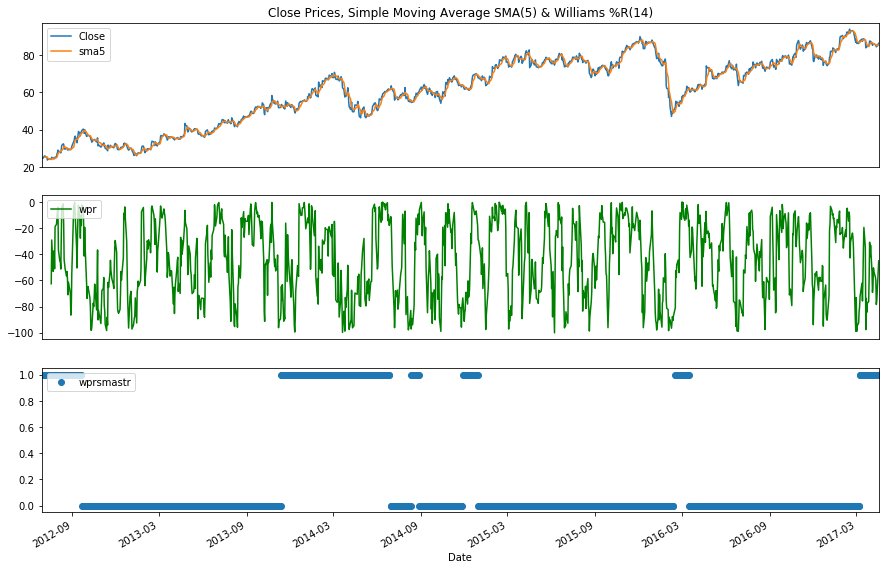

In [109]:
# Trading Strategy Chart
ax1 = plt.subplot(3, 1, 1)
plt.title('Close Prices, Simple Moving Average SMA(5) & Williams %R(14)')
plt.gca().axes.get_xaxis().set_visible(False)
aapl.plot(y=['Close', 'sma5'], ax=ax1)
plt.legend(loc='upper left')
ax2 = plt.subplot(3, 1, 2)
aapl.plot(y=['wpr'], color='g', ax=ax2)
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
ax3 = plt.subplot(3, 1, 3)
aapl.plot(y=['wprsmastr'], marker='o', linestyle='', ax=ax3)
plt.legend(loc='upper left')
plt.show()

In [110]:
# Strategy Performance Comparison

In [111]:
# Daily Returns

In [112]:
# Price Crossover Strategy Without Trading Commissions
aapl['sma5drt'] = ((aapl['Close']/aapl['Close'].shift(1))-1)*aapl['sma5str']
aapl.ix[0, 'sma5drt'] = 0

In [113]:
# Price Crossover Strategy With Trading Commissions (1% Per Trade)
aapl['sma5str(-1)'] = aapl['sma5str'].shift(1)
aapl['sma5tc'] = aapl['sma5sig']
sma5tc = 0
for i, r in enumerate(aapl.iterrows()):
    if (r[1]['sma5sig'] == 1 or r[1]['sma5sig'] == -1) and r[1]['sma5str'] != r[1]['sma5str(-1)']:
        sma5tc = 0.01
    else:
        sma5tc = 0.00
    aapl.ix[i, 'sma5tc'] = sma5tc

aapl['sma5drtc'] = (((aapl['Close']/aapl['Close'].shift(1))-1)-aapl['sma5tc'])*aapl['sma5str']
aapl.ix[0, 'sma5drtc'] = 0

In [114]:
# Buy and Hold Strategy
aapl['bhdrt'] = (aapl['Close']/aapl['Close'].shift(1))-1
aapl.ix[0, 'bhdrt'] = 0

In [115]:
# Cumulative Returns

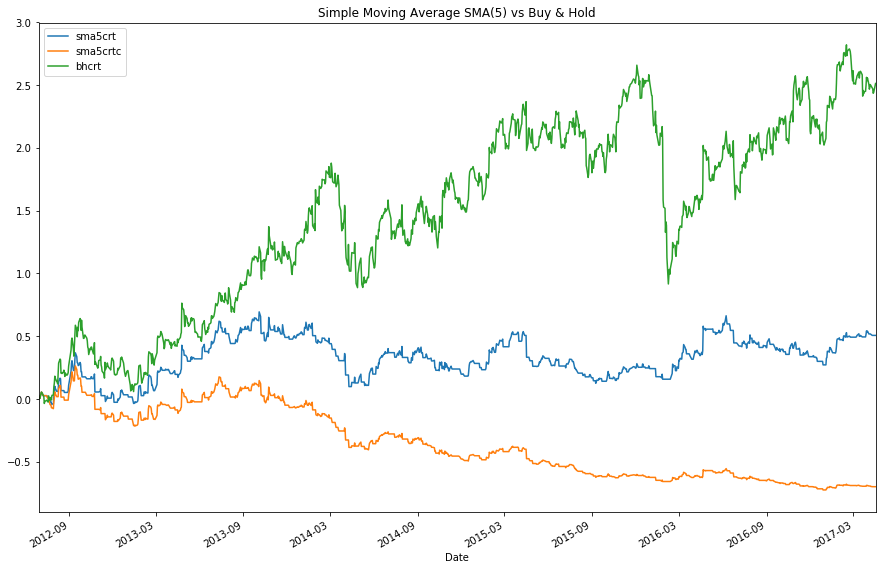

In [116]:
# CR Calculation
aapl['sma5crt'] = np.cumprod(aapl['sma5drt']+1)-1
aapl['sma5crtc'] = np.cumprod(aapl['sma5drtc']+1)-1
aapl['bhcrt'] = np.cumprod(aapl['bhdrt']+1)-1
# CR Chart
aapl.plot(y=['sma5crt', 'sma5crtc', 'bhcrt'])
plt.title('Simple Moving Average SMA(5) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

In [117]:
# Strategies Performance Metrics

In [118]:
# Annualized Returns
sma5yrt = aapl.ix[251, 'sma5crt']
sma5yrtc = aapl.ix[251, 'sma5crtc']
bhyrt = aapl.ix[251, 'bhcrt']

In [119]:
# Annualized Standard Deviation
sma5std = np.std(aapl['sma5drt'])*np.sqrt(252)
sma5stdc = np.std(aapl['sma5drtc'])*np.sqrt(252)
bhstd = np.std(aapl['bhdrt'])*np.sqrt(252)

In [120]:
# Annualized Sharpe Ratio
sma5sr = sma5yrt/sma5std
sma5src = sma5yrtc/sma5stdc
bhsr = bhyrt/bhstd

In [121]:
# Summary Results Data Table
data = [{'0': '', '1': 'SMA(5)', '2': 'SMA(5)TC', '3': 'B&H'},
        {'0': 'Annualized Return', '1': sma5yrt, '2': sma5yrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': sma5std, '2': sma5stdc, '3': bhstd},
        {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': sma5sr, '2': sma5src, '3': bhsr}]
table = pd.DataFrame(data)
print(aapl)
print(table)

                 Open       High        Low      Close    Volume  Adj Close  \
Date                                                                          
2012-06-29  23.750000  24.750000  22.830000  24.600000  10922400  24.600000   
2012-07-02  24.750000  25.200001  24.100000  24.770000    656700  24.770000   
2012-07-03  24.850000  25.320000  24.600000  25.309999    401100  25.309999   
2012-07-05  25.500000  26.260000  25.139999  25.959999    541000  25.959999   
2012-07-06  25.750000  26.120001  25.100000  25.840000    355100  25.840000   
2012-07-09  25.959999  26.299999  25.180000  25.270000    152400  25.270000   
2012-07-10  25.219999  25.690001  25.049999  25.049999    304000  25.049999   
2012-07-11  25.020000  25.350000  23.490000  23.740000    296500  23.740000   
2012-07-12  23.299999  24.469999  22.620001  24.080000    325500  24.080000   
2012-07-13  24.690001  24.920000  23.980000  24.180000     89100  24.180000   
2012-07-16  24.080000  24.559999  23.799999  24.3799

In [122]:
# EMA
# Without Trading Commissions
aapl['emadrt'] = ((aapl['Close']/aapl['Close'].shift(1))-1)*aapl['emastr']
aapl.ix[0, 'emadrt'] = 0

In [123]:
# With Trading Commissions (1% Per Trade)
aapl['emastr(-1)'] = aapl['emastr'].shift(1)
aapl['ematc'] = aapl['emasig']
ematc = 0
for i, r in enumerate(aapl.iterrows()):
    if (r[1]['emasig'] == 1 or r[1]['emasig'] == -1) and r[1]['emastr'] != r[1]['emastr(-1)']:
        ematc = 0.01
    else:
        ematc = 0.00
    aapl.ix[i, 'ematc'] = ematc
    
aapl['emadrtc'] = (((aapl['Close']/aapl['Close'].shift(1))-1)-aapl['ematc'])*aapl['emastr']
aapl.ix[0, 'emadrtc'] = 0

In [124]:
# Buy and Hold Strategy
aapl['bhdrt'] = (aapl['Close']/aapl['Close'].shift(1))-1
aapl.ix[0, 'bhdrt'] = 0

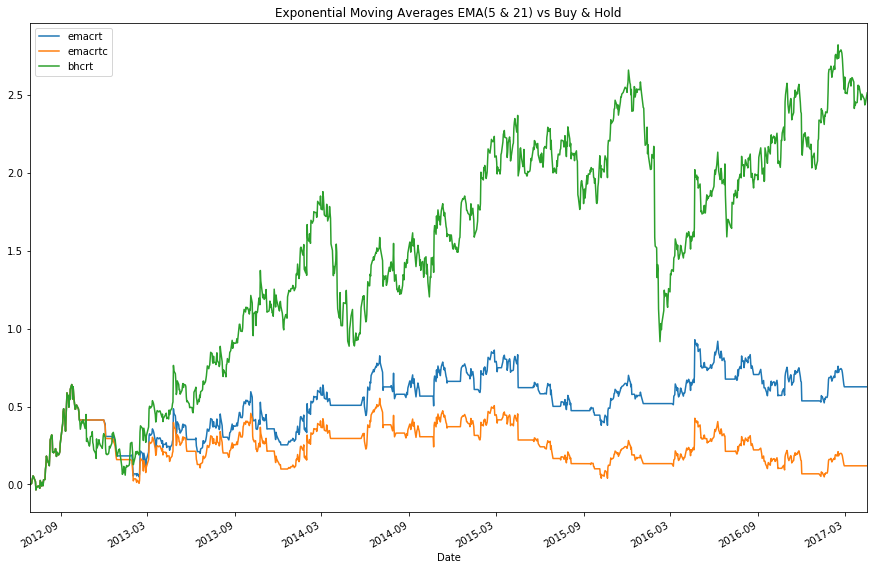

In [125]:
# Cumulative Returns Calculation
aapl['emacrt'] = np.cumprod(aapl['emadrt']+1)-1
aapl['emacrtc'] = np.cumprod(aapl['emadrtc']+1)-1
aapl['bhcrt'] = np.cumprod(aapl['bhdrt']+1)-1
# Cumulative Returns Chart
aapl.plot(y=['emacrt', 'emacrtc', 'bhcrt'])
plt.title('Exponential Moving Averages EMA(5 & 21) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

In [126]:
# Annualized Returns
emayrt = aapl.ix[251, 'emacrt']
emayrtc = aapl.ix[251, 'emacrtc']
bhyrt = aapl.ix[251, 'bhcrt']
# Annualized Standard Deviation
emastd = np.std(aapl['emadrt'])*np.sqrt(252)
emastdc = np.std(aapl['emadrtc'])*np.sqrt(252)
bhstd = np.std(aapl['bhdrt'])*np.sqrt(252)
# Annualized Sharpe Ratio
emasr = emayrt/emastd
emasrc = emayrtc/emastdc
bhsr = bhyrt/bhstd
# Summary Results Data Table
data = [{'0': '', '1': 'EMA(5 & 21)', '2': 'EMA(5 & 21)TC', '3': 'B&H'},
        {'0': 'Annualized Return', '1': emayrt, '2': emayrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': emastd, '2': emastdc, '3': bhstd},
        {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': emasr, '2': emasrc, '3': bhsr}]
table = pd.DataFrame(data)
print(aapl)
print(table)

                 Open       High        Low      Close    Volume  Adj Close  \
Date                                                                          
2012-06-29  23.750000  24.750000  22.830000  24.600000  10922400  24.600000   
2012-07-02  24.750000  25.200001  24.100000  24.770000    656700  24.770000   
2012-07-03  24.850000  25.320000  24.600000  25.309999    401100  25.309999   
2012-07-05  25.500000  26.260000  25.139999  25.959999    541000  25.959999   
2012-07-06  25.750000  26.120001  25.100000  25.840000    355100  25.840000   
2012-07-09  25.959999  26.299999  25.180000  25.270000    152400  25.270000   
2012-07-10  25.219999  25.690001  25.049999  25.049999    304000  25.049999   
2012-07-11  25.020000  25.350000  23.490000  23.740000    296500  23.740000   
2012-07-12  23.299999  24.469999  22.620001  24.080000    325500  24.080000   
2012-07-13  24.690001  24.920000  23.980000  24.180000     89100  24.180000   
2012-07-16  24.080000  24.559999  23.799999  24.3799

In [127]:
# Bollinger Bands

In [128]:
# Without Trading Commissions
aapl['bbdrt'] = ((aapl['Close']/aapl['Close'].shift(1))-1)*aapl['bbstr']
aapl.ix[0, 'bbdrt'] = 0

In [129]:
# With Trading Commissions (1% Per Trade)
aapl['bbstr(-1)'] = aapl['bbstr'].shift(1)
aapl['bbtc'] = aapl['bbsig']
bbtc = 0
for i, r in enumerate(aapl.iterrows()):
    if (r[1]['bbsig'] == 1 or r[1]['bbsig'] == -1) and r[1]['bbstr'] != r[1]['bbstr(-1)']:
        bbtc = 0.01
    else:
        bbtc = 0.00
    aapl.ix[i, 'bbtc'] = bbtc

aapl['bbdrtc'] = (((aapl['Close']/aapl['Close'].shift(1))-1)-aapl['bbtc'])*aapl['bbstr']
aapl.ix[0, 'bbdrtc'] = 0

In [130]:
# Buy and Hold Strategy
aapl['bhdrt'] = (aapl['Close']/aapl['Close'].shift(1))-1
aapl.ix[0, 'bhdrt'] = 0

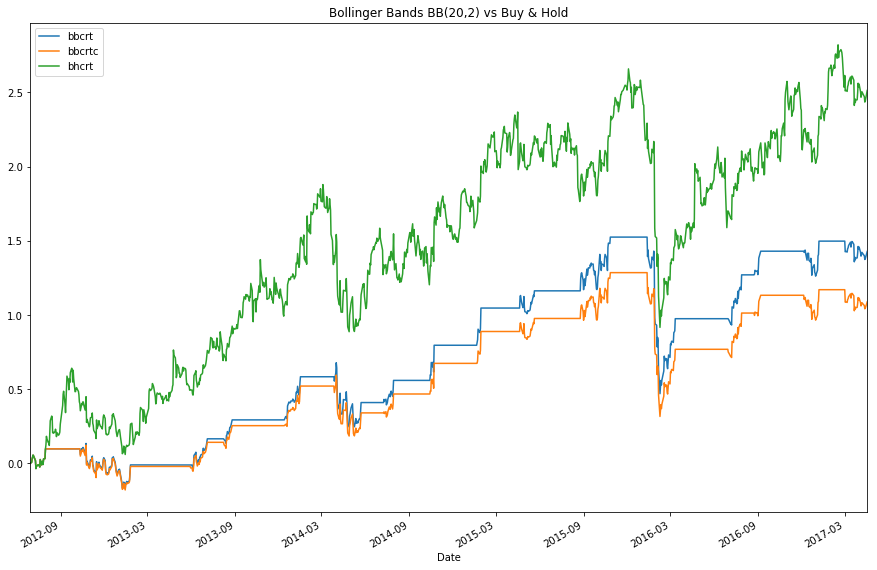

In [131]:
# Cumulative Returns Calculation
aapl['bbcrt'] = np.cumprod(aapl['bbdrt']+1)-1
aapl['bbcrtc'] = np.cumprod(aapl['bbdrtc']+1)-1
aapl['bhcrt'] = np.cumprod(aapl['bhdrt']+1)-1

# Cumulative Returns Chart
aapl.plot(y=['bbcrt', 'bbcrtc', 'bhcrt'])
plt.title('Bollinger Bands BB(20,2) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

In [132]:
# Annualized Returns
bbyrt = aapl.ix[251, 'bbcrt']
bbyrtc = aapl.ix[251, 'bbcrtc']
bhyrt = aapl.ix[251, 'bhcrt']

# Annualized Standard Deviation
bbstd = np.std(aapl['bbdrt'])*np.sqrt(252)
bbstdc = np.std(aapl['bbdrtc'])*np.sqrt(252)
bhstd = np.std(aapl['bhdrt'])*np.sqrt(252)

# Annualized Sharpe Ratio
bbsr = bbyrt/bbstd
bbsrc = bbyrtc/bbstdc
bhsr = bhyrt/bhstd

In [133]:
# Summary Results Data Table
data = [{'0': '', '1': 'BB(20,2)', '2': 'BB(20,2)TC', '3': 'B&H'},
        {'0': 'Annualized Return', '1': bbyrt, '2': bbyrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': bbstd, '2': bbstdc, '3': bhstd},
        {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': bbsr, '2': bbsrc, '3': bhsr}]
table = pd.DataFrame(data)
print(aapl)
print(table)

                 Open       High        Low      Close    Volume  Adj Close  \
Date                                                                          
2012-06-29  23.750000  24.750000  22.830000  24.600000  10922400  24.600000   
2012-07-02  24.750000  25.200001  24.100000  24.770000    656700  24.770000   
2012-07-03  24.850000  25.320000  24.600000  25.309999    401100  25.309999   
2012-07-05  25.500000  26.260000  25.139999  25.959999    541000  25.959999   
2012-07-06  25.750000  26.120001  25.100000  25.840000    355100  25.840000   
2012-07-09  25.959999  26.299999  25.180000  25.270000    152400  25.270000   
2012-07-10  25.219999  25.690001  25.049999  25.049999    304000  25.049999   
2012-07-11  25.020000  25.350000  23.490000  23.740000    296500  23.740000   
2012-07-12  23.299999  24.469999  22.620001  24.080000    325500  24.080000   
2012-07-13  24.690001  24.920000  23.980000  24.180000     89100  24.180000   
2012-07-16  24.080000  24.559999  23.799999  24.3799

In [134]:
# Parabolic SAR

In [135]:
# Without Trading Commissions
aapl['sardrt'] = ((aapl['Close']/aapl['Close'].shift(1))-1)*aapl['sarstr']
aapl.ix[0, 'sardrt'] = 0

In [136]:
# Stop and Reverse Strategy With Trading Commissions (1% Per Trade)
aapl['sarstr(-1)'] = aapl['sarstr'].shift(1)
aapl['sartc'] = aapl['sarsig']
sartc = 0
for i, r in enumerate(aapl.iterrows()):
    if (r[1]['sarsig'] == 1 or r[1]['sarsig'] == -1) and r[1]['sarstr'] != r[1]['sarstr(-1)']:
        sartc = 0.01
    else:
        sartc = 0.00
    aapl.ix[i, 'sartc'] = sartc
    
aapl['sardrtc'] = (((aapl['Close']/aapl['Close'].shift(1))-1)-aapl['sartc'])*aapl['sarstr']
aapl.ix[0, 'sardrtc'] = 0

In [137]:
# Buy and Hold Strategy
aapl['bhdrt'] = (aapl['Close']/aapl['Close'].shift(1))-1
aapl.ix[0, 'bhdrt'] = 0

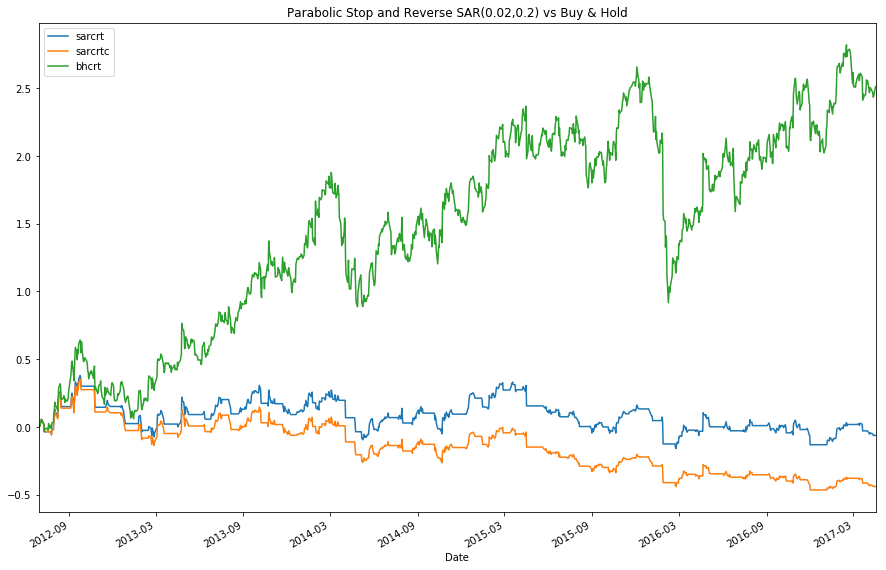

In [138]:
# Cumulative Returns Calculation
aapl['sarcrt'] = np.cumprod(aapl['sardrt']+1)-1
aapl['sarcrtc'] = np.cumprod(aapl['sardrtc']+1)-1
aapl['bhcrt'] = np.cumprod(aapl['bhdrt']+1)-1

# Cumulative Returns Chart
aapl.plot(y=['sarcrt', 'sarcrtc', 'bhcrt'])
plt.title('Parabolic Stop and Reverse SAR(0.02,0.2) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

In [139]:
# Annualized Returns
saryrt = aapl.ix[251, 'sarcrt']
saryrtc = aapl.ix[251, 'sarcrtc']
bhyrt = aapl.ix[251, 'bhcrt']

# Annualized Standard Deviation
sarstd = np.std(aapl['sardrt'])*np.sqrt(252)
sarstdc = np.std(aapl['sardrtc'])*np.sqrt(252)
bhstd = np.std(aapl['bhdrt'])*np.sqrt(252)

# Annualized Sharpe Ratio
sarsr = saryrt/sarstd
sarsrc = saryrtc/sarstdc
bhsr = bhyrt/bhstd

In [140]:
# Summary Results Data Table
data = [{'0': '', '1': 'SAR(0.02,0.2)', '2': 'SAR(0.02,0.2)TC', '3': 'B&H'},
        {'0': 'Annualized Return', '1': saryrt, '2': saryrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': sarstd, '2': sarstdc, '3': bhstd},
        {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': sarsr, '2': sarsrc, '3': bhsr}]
table = pd.DataFrame(data)
print(aapl)
print(table)

                 Open       High        Low      Close    Volume  Adj Close  \
Date                                                                          
2012-06-29  23.750000  24.750000  22.830000  24.600000  10922400  24.600000   
2012-07-02  24.750000  25.200001  24.100000  24.770000    656700  24.770000   
2012-07-03  24.850000  25.320000  24.600000  25.309999    401100  25.309999   
2012-07-05  25.500000  26.260000  25.139999  25.959999    541000  25.959999   
2012-07-06  25.750000  26.120001  25.100000  25.840000    355100  25.840000   
2012-07-09  25.959999  26.299999  25.180000  25.270000    152400  25.270000   
2012-07-10  25.219999  25.690001  25.049999  25.049999    304000  25.049999   
2012-07-11  25.020000  25.350000  23.490000  23.740000    296500  23.740000   
2012-07-12  23.299999  24.469999  22.620001  24.080000    325500  24.080000   
2012-07-13  24.690001  24.920000  23.980000  24.180000     89100  24.180000   
2012-07-16  24.080000  24.559999  23.799999  24.3799

In [141]:
# ADX

In [142]:
# Without Trading Commissions
aapl['adxdrt'] = ((aapl['Close']/aapl['Close'].shift(1))-1)*aapl['adxstr']
aapl.ix[0, 'adxdrt'] = 0

In [143]:
# With Trading Commissions (1% Per Trade)
aapl['adxstr(-1)'] = aapl['adxstr'].shift(1)
aapl['adxtc'] = aapl['adxsig']
adxtc = 0
for i, r in enumerate(aapl.iterrows()):
    if (r[1]['adxsig'] == 1 or r[1]['adxsig'] == -1) and r[1]['adxstr'] != r[1]['adxstr(-1)']:
        adxtc = 0.01
    else:
        adxtc = 0.00
    aapl.ix[i, 'adxtc'] = adxtc
    
aapl['adxdrtc'] = (((aapl['Close']/aapl['Close'].shift(1))-1)-aapl['adxtc'])*aapl['adxstr']
aapl.ix[0, 'adxdrtc'] = 0

In [144]:
# Buy and Hold Strategy
aapl['bhdrt'] = (aapl['Close']/aapl['Close'].shift(1))-1
aapl.ix[0, 'bhdrt'] = 0

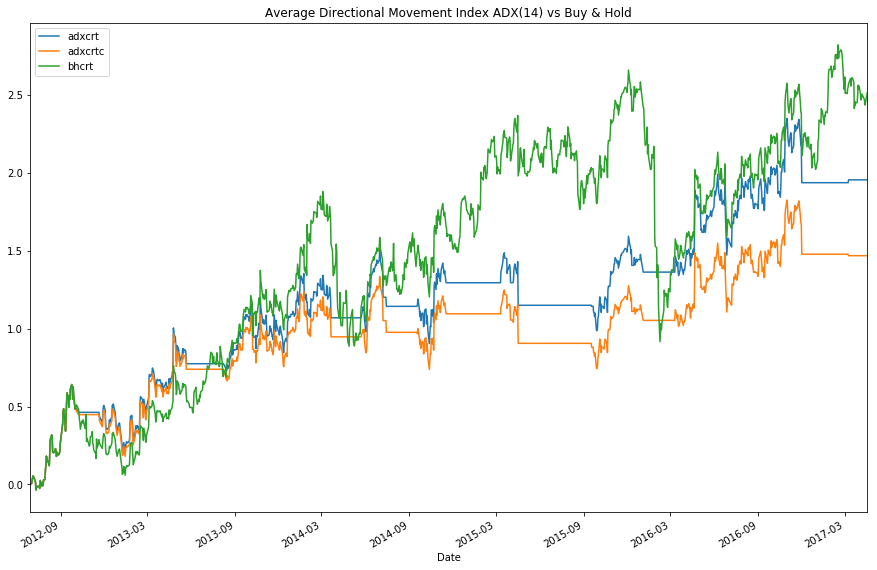

In [145]:
# Cumulative Returns Calculation
aapl['adxcrt'] = np.cumprod(aapl['adxdrt']+1)-1
aapl['adxcrtc'] = np.cumprod(aapl['adxdrtc']+1)-1
aapl['bhcrt'] = np.cumprod(aapl['bhdrt']+1)-1

# Cumulative Returns Chart
aapl.plot(y=['adxcrt', 'adxcrtc', 'bhcrt'])
plt.title('Average Directional Movement Index ADX(14) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

In [146]:
# Annualized Returns
adxyrt = aapl.ix[251, 'adxcrt']
adxyrtc = aapl.ix[251, 'adxcrtc']
bhyrt = aapl.ix[251, 'bhdrt']

# Annualized Standard Deviation
adxstd = np.std(aapl['adxdrt'])*np.sqrt(252)
adxstdc = np.std(aapl['adxdrtc'])*np.sqrt(252)
bhstd = np.std(aapl['bhdrt'])*np.sqrt(252)

# Annualized Sharpe Ratio
adxsr = adxyrt/adxstd
adxsrc = adxyrtc/adxstdc
bhsr = bhyrt/bhstd

In [147]:
# Summary Results Data Table
data = [{'0': '', '1': 'ADX(14)', '2': 'ADX(14)TC', '3': 'B&H'},
        {'0': 'Annualized Return', '1': adxyrt, '2': adxyrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': adxstd, '2': adxstdc, '3': bhstd},
        {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': adxsr, '2': adxsrc, '3': bhsr}]
table = pd.DataFrame(data)
print(aapl)
print(table)

                 Open       High        Low      Close    Volume  Adj Close  \
Date                                                                          
2012-06-29  23.750000  24.750000  22.830000  24.600000  10922400  24.600000   
2012-07-02  24.750000  25.200001  24.100000  24.770000    656700  24.770000   
2012-07-03  24.850000  25.320000  24.600000  25.309999    401100  25.309999   
2012-07-05  25.500000  26.260000  25.139999  25.959999    541000  25.959999   
2012-07-06  25.750000  26.120001  25.100000  25.840000    355100  25.840000   
2012-07-09  25.959999  26.299999  25.180000  25.270000    152400  25.270000   
2012-07-10  25.219999  25.690001  25.049999  25.049999    304000  25.049999   
2012-07-11  25.020000  25.350000  23.490000  23.740000    296500  23.740000   
2012-07-12  23.299999  24.469999  22.620001  24.080000    325500  24.080000   
2012-07-13  24.690001  24.920000  23.980000  24.180000     89100  24.180000   
2012-07-16  24.080000  24.559999  23.799999  24.3799

In [148]:
# CCI

In [149]:
# Without Trading Commissions
aapl['ccidrt'] = ((aapl['Close']/aapl['Close'].shift(1))-1)*aapl['ccistr']
aapl.ix[0, 'ccidrt'] = 0

In [150]:
# With Trading Commissions (1% Per Trade)
aapl['ccistr(-1)'] = aapl['ccistr'].shift(1)
aapl['ccitc'] = aapl['ccisig']
ccitc = 0
for i, r in enumerate(aapl.iterrows()):
    if (r[1]['ccisig'] == 1 or r[1]['ccisig'] == -1) and r[1]['ccistr'] != r[1]['ccistr(-1)']:
        ccitc = 0.01
    else:
        ccitc = 0.00
    aapl.ix[i, 'ccitc'] = ccitc
    
aapl['ccidrtc'] = (((aapl['Close']/aapl['Close'].shift(1))-1)-aapl['ccitc'])*aapl['ccistr']
aapl.ix[0, 'ccidrtc'] = 0

In [151]:
# Buy and Hold Strategy
aapl['bhdrt'] = (aapl['Close']/aapl['Close'].shift(1))-1
aapl.ix[0, 'bhdrt'] = 0

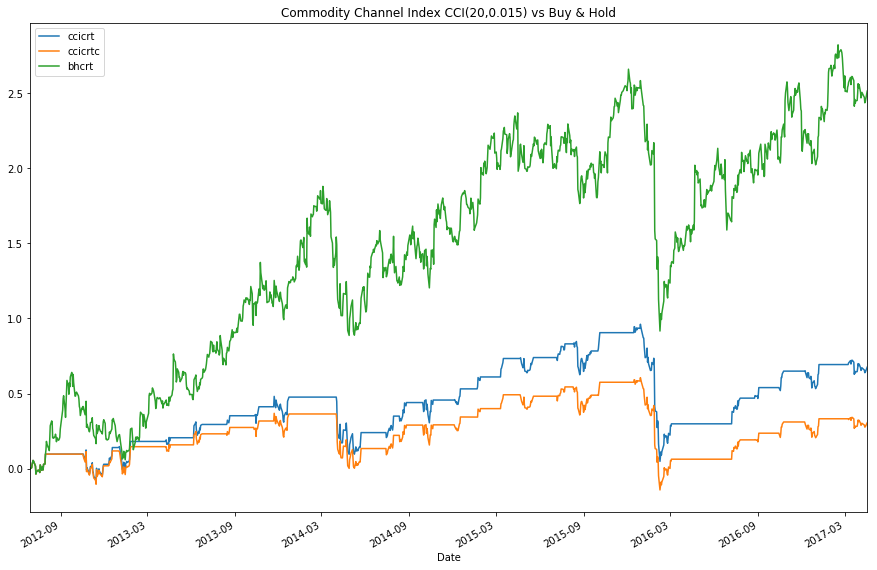

In [152]:
# Cumulative Returns Calculation
aapl['ccicrt'] = np.cumprod(aapl['ccidrt']+1)-1
aapl['ccicrtc'] = np.cumprod(aapl['ccidrtc']+1)-1
aapl['bhcrt'] = np.cumprod(aapl['bhdrt']+1)-1

# Cumulative Returns Chart
aapl.plot(y=['ccicrt', 'ccicrtc', 'bhcrt'])
plt.title('Commodity Channel Index CCI(20,0.015) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

In [153]:
# Annualized Returns
cciyrt = aapl.ix[251, 'ccicrt']
cciyrtc = aapl.ix[251, 'ccicrtc']
bhyrt = aapl.ix[251, 'bhcrt']

# Annualized Standard Deviation
ccistd = np.std(aapl['ccidrt'])*np.sqrt(252)
ccistdc = np.std(aapl['ccidrtc'])*np.sqrt(252)
bhstd = np.std(aapl['bhdrt'])*np.sqrt(252)

# Annualized Sharpe Ratio
ccisr = cciyrt/ccistd
ccisrc = cciyrtc/ccistdc
bhsr = bhyrt/bhstd

In [154]:
# Summary Results Data Table
data = [{'0': '', '1': 'CCI(20,0.015)', '2': 'CCI(20,0.015)TC', '3': 'B&H'},
        {'0': 'Annualized Return', '1': cciyrt, '2': cciyrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': ccistd, '2': ccistdc, '3': bhstd},
        {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': ccisr, '2': ccisrc, '3': bhsr}]
table = pd.DataFrame(data)
print(aapl)
print(table)

                 Open       High        Low      Close    Volume  Adj Close  \
Date                                                                          
2012-06-29  23.750000  24.750000  22.830000  24.600000  10922400  24.600000   
2012-07-02  24.750000  25.200001  24.100000  24.770000    656700  24.770000   
2012-07-03  24.850000  25.320000  24.600000  25.309999    401100  25.309999   
2012-07-05  25.500000  26.260000  25.139999  25.959999    541000  25.959999   
2012-07-06  25.750000  26.120001  25.100000  25.840000    355100  25.840000   
2012-07-09  25.959999  26.299999  25.180000  25.270000    152400  25.270000   
2012-07-10  25.219999  25.690001  25.049999  25.049999    304000  25.049999   
2012-07-11  25.020000  25.350000  23.490000  23.740000    296500  23.740000   
2012-07-12  23.299999  24.469999  22.620001  24.080000    325500  24.080000   
2012-07-13  24.690001  24.920000  23.980000  24.180000     89100  24.180000   
2012-07-16  24.080000  24.559999  23.799999  24.3799

In [155]:
# Moving Averages Convergence and Divergence

In [156]:
# Trading Commissions
aapl['macddrt'] = ((aapl['Close']/aapl['Close'].shift(1))-1)*aapl['macdstr']
aapl.ix[0, 'macddrt'] = 0

In [157]:
# With Trading Commissions (1% Per Trade)
aapl['macdstr(-1)'] = aapl['macdstr'].shift(1)
aapl['macdtc'] = aapl['macdsig']
macdtc = 0
for i, r in enumerate(aapl.iterrows()):
    if (r[1]['macdsig'] == 1 or r[1]['macdsig'] == -1) and r[1]['macdstr'] != r[1]['macdstr(-1)']:
        macdtc = 0.01
    else:
        macdtc = 0.00
    aapl.ix[i, 'macdtc'] = macdtc

aapl['macddrtc'] = (((aapl['Close']/aapl['Close'].shift(1))-1)-aapl['macdtc'])*aapl['macdstr']
aapl.ix[0, 'macddrtc'] = 0

In [158]:
# Buy and Hold Strategy
aapl['bhdrt'] = (aapl['Close']/aapl['Close'].shift(1))-1
aapl.ix[0, 'bhdrt'] = 0

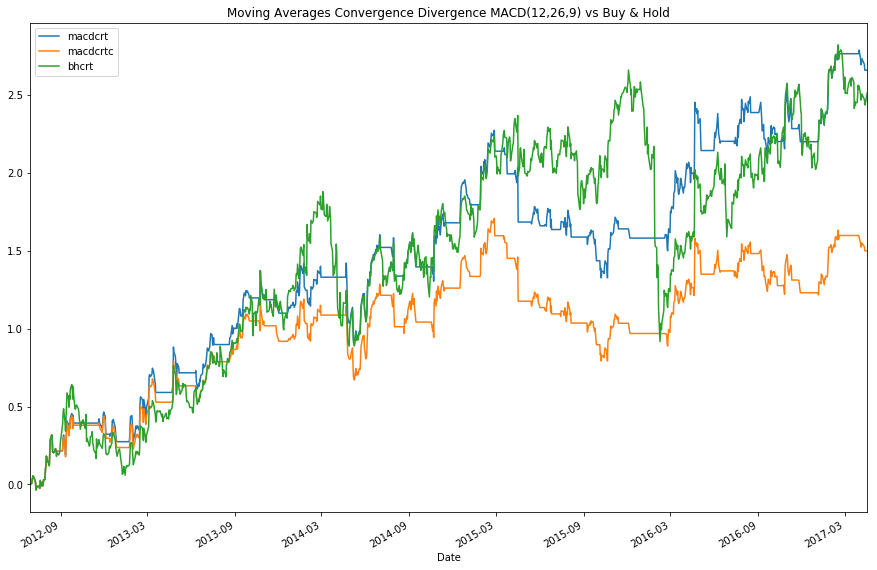

In [159]:
# Cumulative Returns Calculation
aapl['macdcrt'] = np.cumprod(aapl['macddrt']+1)-1
aapl['macdcrtc'] = np.cumprod(aapl['macddrtc']+1)-1
aapl['bhcrt'] = np.cumprod(aapl['bhdrt']+1)-1

# Cumulative Returns Chart
aapl.plot(y=['macdcrt', 'macdcrtc', 'bhcrt'])
plt.title('Moving Averages Convergence Divergence MACD(12,26,9) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

In [160]:
# Annualized Returns
macdyrt = aapl.ix[251, 'macdcrt']
macdyrtc = aapl.ix[251, 'macdcrtc']
bhyrt = aapl.ix[251, 'bhcrt']

# Annualized Standard Deviation
macdstd = np.std(aapl['macddrt'])*np.sqrt(252)
macdstdc = np.std(aapl['macddrtc'])*np.sqrt(252)
bhstd = np.std(aapl['bhdrt'])*np.sqrt(252)

# Annualized Sharpe Ratio
macdsr = macdyrt/macdstd
macdsrc = macdyrtc/macdstdc
bhsr = bhyrt/bhstd

In [161]:
# Summary Results Data Table
data = [{'0': '', '1': 'MACD(12,26,9)', '2': 'MACD(12,26,9)TC', '3': 'B&H'},
        {'0': 'Annualized Return', '1': macdyrt, '2': macdyrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': macdstd, '2': macdstdc, '3': bhstd},
        {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': macdsr, '2': macdsrc, '3': bhsr}]
table = pd.DataFrame(data)
print(aapl)
print(table)

                 Open       High        Low      Close    Volume  Adj Close  \
Date                                                                          
2012-06-29  23.750000  24.750000  22.830000  24.600000  10922400  24.600000   
2012-07-02  24.750000  25.200001  24.100000  24.770000    656700  24.770000   
2012-07-03  24.850000  25.320000  24.600000  25.309999    401100  25.309999   
2012-07-05  25.500000  26.260000  25.139999  25.959999    541000  25.959999   
2012-07-06  25.750000  26.120001  25.100000  25.840000    355100  25.840000   
2012-07-09  25.959999  26.299999  25.180000  25.270000    152400  25.270000   
2012-07-10  25.219999  25.690001  25.049999  25.049999    304000  25.049999   
2012-07-11  25.020000  25.350000  23.490000  23.740000    296500  23.740000   
2012-07-12  23.299999  24.469999  22.620001  24.080000    325500  24.080000   
2012-07-13  24.690001  24.920000  23.980000  24.180000     89100  24.180000   
2012-07-16  24.080000  24.559999  23.799999  24.3799

In [162]:
# ROC

In [163]:
# Without Trading Commissions
aapl['rocdrt'] = ((aapl['Close']/aapl['Close'].shift(1))-1)*aapl['rocstr']
aapl.ix[0, 'rocdrt'] = 0

In [164]:
# With Trading Commissions (1% Per Trade)
aapl['rocstr(-1)'] = aapl['rocstr'].shift(1)
aapl['roctc'] = aapl['rocsig']
roctc = 0
for i, r in enumerate(aapl.iterrows()):
    if (r[1]['rocsig'] == 1 or r[1]['rocsig'] == -1) and r[1]['rocstr'] != r[1]['rocstr(-1)']:
        roctc = 0.01
    else:
        roctc = 0.00
    aapl.ix[i, 'roctc'] = roctc

aapl['rocdrtc'] = (((aapl['Close']/aapl['Close'].shift(1))-1)-aapl['roctc'])*aapl['rocstr']
aapl.ix[0, 'rocdrtc'] = 0

In [165]:
# Buy and Hold Strategy
aapl['bhdrt'] = (aapl['Close']/aapl['Close'].shift(1))-1
aapl.ix[0, 'bhdrt'] = 0

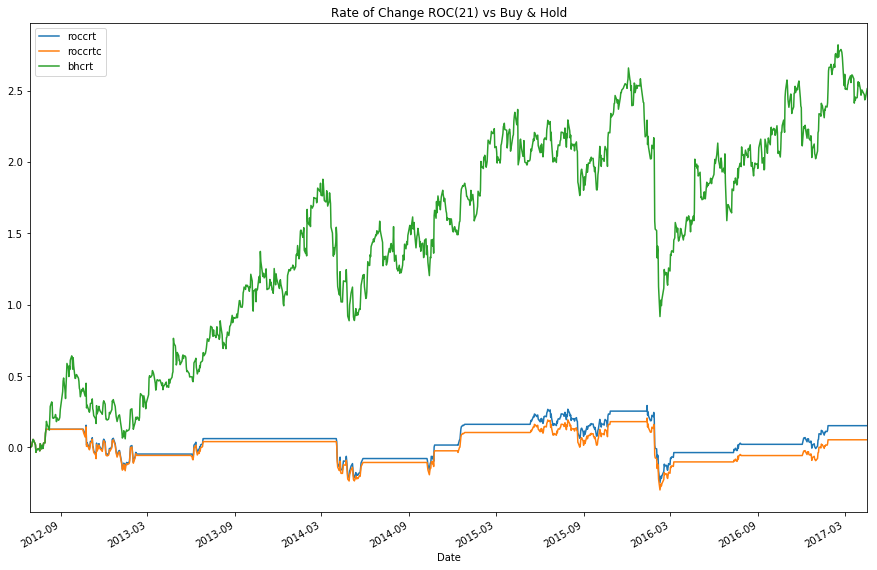

In [166]:
# Cumulative Returns Calculation
aapl['roccrt'] = np.cumprod(aapl['rocdrt']+1)-1
aapl['roccrtc'] = np.cumprod(aapl['rocdrtc']+1)-1
aapl['bhcrt'] = np.cumprod(aapl['bhdrt']+1)-1

# Cumulative Returns Chart
aapl.plot(y=['roccrt', 'roccrtc', 'bhcrt'])
plt.title('Rate of Change ROC(21) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

In [167]:
# Annualized Returns
rocyrt = aapl.ix[251, 'roccrt']
rocyrtc = aapl.ix[251, 'roccrtc']
bhyrt = aapl.ix[251, 'bhcrt']

# Annualized Standard Deviation
rocstd = np.std(aapl['rocdrt'])*np.sqrt(252)
rocstdc = np.std(aapl['rocdrtc'])*np.sqrt(252)
bhstd = np.std(aapl['bhdrt'])*np.sqrt(252)

# Annualized Sharpe Ratio
rocsr = rocyrt/rocstd
rocsrc = rocyrtc/rocstdc
bhsr = bhyrt/bhstd

In [168]:
# Summary Results Data Table
data = [{'0': '', '1': 'ROC(21)', '2': 'ROC(21)TC', '3': 'B&H'},
        {'0': 'Annualized Return', '1': rocyrt, '2': rocyrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': rocstd, '2': rocstdc, '3': bhstd},
        {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': rocsr, '2': rocsrc, '3': bhsr}]
table = pd.DataFrame(data)
print(aapl)
print(table)

                 Open       High        Low      Close    Volume  Adj Close  \
Date                                                                          
2012-06-29  23.750000  24.750000  22.830000  24.600000  10922400  24.600000   
2012-07-02  24.750000  25.200001  24.100000  24.770000    656700  24.770000   
2012-07-03  24.850000  25.320000  24.600000  25.309999    401100  25.309999   
2012-07-05  25.500000  26.260000  25.139999  25.959999    541000  25.959999   
2012-07-06  25.750000  26.120001  25.100000  25.840000    355100  25.840000   
2012-07-09  25.959999  26.299999  25.180000  25.270000    152400  25.270000   
2012-07-10  25.219999  25.690001  25.049999  25.049999    304000  25.049999   
2012-07-11  25.020000  25.350000  23.490000  23.740000    296500  23.740000   
2012-07-12  23.299999  24.469999  22.620001  24.080000    325500  24.080000   
2012-07-13  24.690001  24.920000  23.980000  24.180000     89100  24.180000   
2012-07-16  24.080000  24.559999  23.799999  24.3799

In [169]:
# RSI

In [170]:
# Without Trading Commissions
aapl['rsidrt'] = ((aapl['Close']/aapl['Close'].shift(1))-1)*aapl['rsistr']
aapl.ix[0, 'rsidrt'] = 0

In [171]:
# With Trading Commissions (1% Per Trade)
aapl['rsistr(-1)'] = aapl['rsistr'].shift(1)
aapl['rsitc'] = aapl['rsisig']
rsitc = 0
for i, r in enumerate(aapl.iterrows()):
    if (r[1]['rsisig'] == 1 or r[1]['rsisig'] == -1) and r[1]['rsistr'] != r[1]['rsistr(-1)']:
        rsitc = 0.01
    else:
        rsitc = 0.00
    aapl.ix[i, 'rsitc'] = rsitc
    
aapl['rsidrtc'] = (((aapl['Close']/aapl['Close'].shift(1))-1)-aapl['rsitc'])*aapl['rsistr']
aapl.ix[0, 'rsidrtc'] = 0

In [172]:
# Buy and Hold Strategy
aapl['bhdrt'] = (aapl['Close']/aapl['Close'].shift(1))-1
aapl.ix[0, 'bhdrt'] = 0

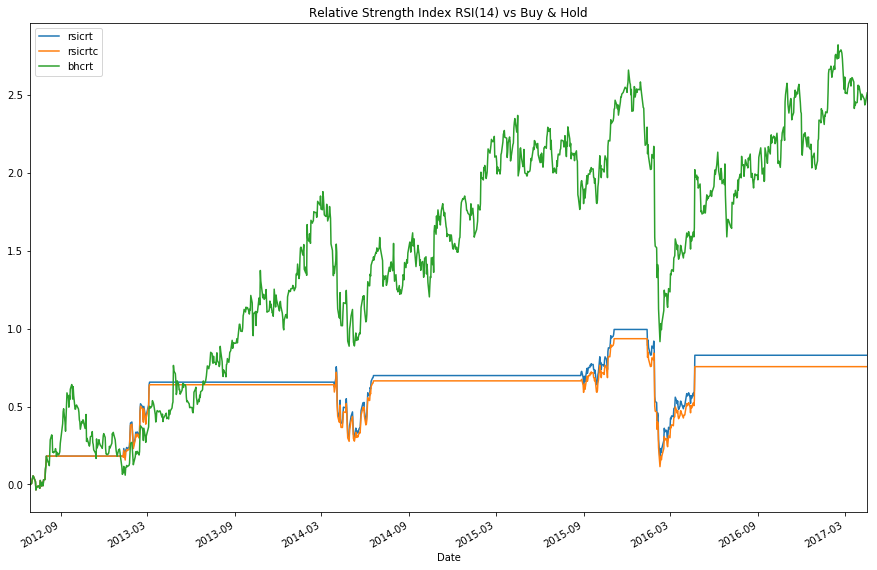

In [173]:
# Cumulative Returns Calculation
aapl['rsicrt'] = np.cumprod(aapl['rsidrt']+1)-1
aapl['rsicrtc'] = np.cumprod(aapl['rsidrtc']+1)-1
aapl['bhcrt'] = np.cumprod(aapl['bhdrt']+1)-1

# Cumulative Returns Chart
aapl.plot(y=['rsicrt', 'rsicrtc', 'bhcrt'])
plt.title('Relative Strength Index RSI(14) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

In [174]:
# Annualized Returns
rsiyrt = aapl.ix[251, 'rsicrt']
rsiyrtc = aapl.ix[251, 'rsicrtc']
bhyrt = aapl.ix[251, 'bhcrt']

# Annualized Standard Deviation
rsistd = np.std(aapl['rsidrt'])*np.sqrt(252)
rsistdc = np.std(aapl['rsidrtc'])*np.sqrt(252)
bhstd = np.std(aapl['bhdrt'])*np.sqrt(252)

# Annualized Sharpe Ratio
rsisr = rsiyrt/rsistd
rsisrc = rsiyrtc/rsistdc
bhsr = bhyrt/bhstd

In [175]:
# Summary Results Data Table
data = [{'0': '', '1': 'RSI(14)', '2': 'RSI(14)TC', '3': 'B&H'},
        {'0': 'Annualized Return', '1': rsiyrt, '2': rsiyrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': rsistd, '2': rsistdc, '3': bhstd},
        {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': rsisr, '2': rsisrc, '3': bhsr}]
table = pd.DataFrame(data)
print(aapl)
print(table)

                 Open       High        Low      Close    Volume  Adj Close  \
Date                                                                          
2012-06-29  23.750000  24.750000  22.830000  24.600000  10922400  24.600000   
2012-07-02  24.750000  25.200001  24.100000  24.770000    656700  24.770000   
2012-07-03  24.850000  25.320000  24.600000  25.309999    401100  25.309999   
2012-07-05  25.500000  26.260000  25.139999  25.959999    541000  25.959999   
2012-07-06  25.750000  26.120001  25.100000  25.840000    355100  25.840000   
2012-07-09  25.959999  26.299999  25.180000  25.270000    152400  25.270000   
2012-07-10  25.219999  25.690001  25.049999  25.049999    304000  25.049999   
2012-07-11  25.020000  25.350000  23.490000  23.740000    296500  23.740000   
2012-07-12  23.299999  24.469999  22.620001  24.080000    325500  24.080000   
2012-07-13  24.690001  24.920000  23.980000  24.180000     89100  24.180000   
2012-07-16  24.080000  24.559999  23.799999  24.3799

In [176]:
# Stochastic Oscillator

In [177]:
# Without Trading Commissions
aapl['stodrt'] = ((aapl['Close']/aapl['Close'].shift(1))-1)*aapl['stostr']
aapl.ix[0, 'stodrt'] = 0

In [178]:
# With Trading Commissions (1% Per Trade)
aapl['stostr(-1)'] = aapl['stostr'].shift(1)
aapl['stotc'] = aapl['stosig']
stotc = 0
for i, r in enumerate(aapl.iterrows()):
    if (r[1]['stosig'] == 1 or r[1]['stosig'] == -1) and r[1]['stostr'] != r[1]['stostr(-1)']:
        stotc = 0.01
    else:
        stotc = 0.00
    aapl.ix[i, 'stotc'] = stotc
    
aapl['stodrtc'] = (((aapl['Close']/aapl['Close'].shift(1))-1)-aapl['stotc'])*aapl['stostr']
aapl.ix[0, 'stotc'] = 0

In [179]:
# Buy and Hold Strategy
aapl['bhdrt'] = (aapl['Close']/aapl['Close'].shift(1))-1
aapl.ix[0, 'bhdrt'] = 0

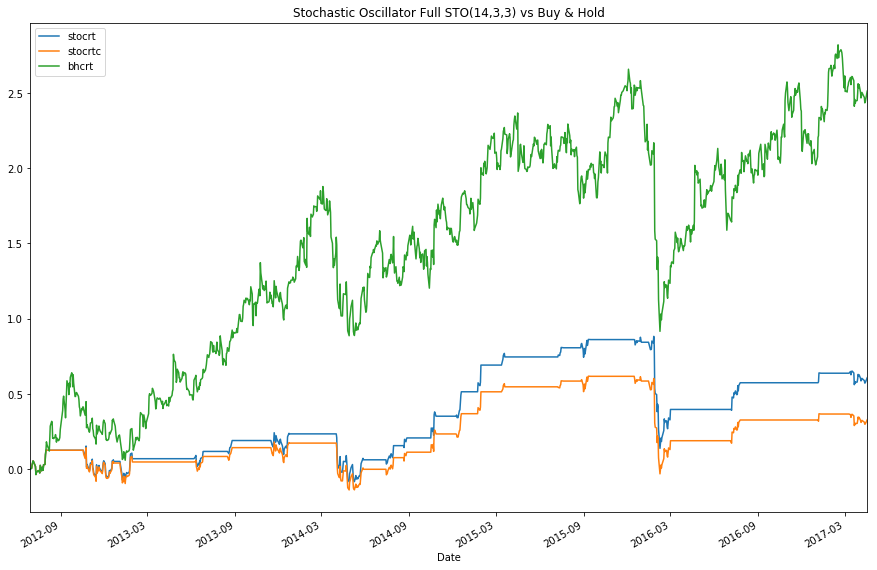

In [180]:
# Cumulative Returns Calculation
aapl['stocrt'] = np.cumprod(aapl['stodrt']+1)-1
aapl['stocrtc'] = np.cumprod(aapl['stodrtc']+1)-1
aapl['bhcrt'] = np.cumprod(aapl['bhdrt']+1)-1

# Cumulative Returns Chart
aapl.plot(y=['stocrt', 'stocrtc', 'bhcrt'])
plt.title('Stochastic Oscillator Full STO(14,3,3) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

In [181]:
# Annualized Returns
stoyrt = aapl.ix[251, 'stocrt']
stoyrtc = aapl.ix[251, 'stocrtc']
bhyrt = aapl.ix[251, 'bhcrt']

# Annualized Standard Deviation
stostd = np.std(aapl['stodrt'])*np.sqrt(252)
stostdc = np.std(aapl['stodrtc'])*np.sqrt(252)
bhstd = np.std(aapl['bhdrt'])*np.sqrt(252)

# Annualized Sharpe Ratio
stosr = stoyrt/stostd
stosrc = stoyrtc/stostdc
bhsr = bhyrt/bhstd

In [182]:
# Summary Results Data Table
data = [{'0': '', '1': 'STO(14,3,3)', '2': 'STO(14,3,3)TC', '3': 'B&H'},
        {'0': 'Annualized Return', '1': stoyrt, '2': stoyrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': stostd, '2': stostdc, '3': bhstd},
        {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': stosr, '2': stosrc, '3': bhsr}]
table = pd.DataFrame(data)
print(aapl)
print(table)

                 Open       High        Low      Close    Volume  Adj Close  \
Date                                                                          
2012-06-29  23.750000  24.750000  22.830000  24.600000  10922400  24.600000   
2012-07-02  24.750000  25.200001  24.100000  24.770000    656700  24.770000   
2012-07-03  24.850000  25.320000  24.600000  25.309999    401100  25.309999   
2012-07-05  25.500000  26.260000  25.139999  25.959999    541000  25.959999   
2012-07-06  25.750000  26.120001  25.100000  25.840000    355100  25.840000   
2012-07-09  25.959999  26.299999  25.180000  25.270000    152400  25.270000   
2012-07-10  25.219999  25.690001  25.049999  25.049999    304000  25.049999   
2012-07-11  25.020000  25.350000  23.490000  23.740000    296500  23.740000   
2012-07-12  23.299999  24.469999  22.620001  24.080000    325500  24.080000   
2012-07-13  24.690001  24.920000  23.980000  24.180000     89100  24.180000   
2012-07-16  24.080000  24.559999  23.799999  24.3799

In [183]:
# William %R

In [184]:
# Without Trading Commissions
aapl['wprdrt'] = ((aapl['Close']/aapl['Close'].shift(1))-1)*aapl['wprstr']
aapl.ix[0, 'wprdrt'] = 0

In [185]:
# With Trading Commissions (1% Per Trade)
aapl['wprstr(-1)'] = aapl['wprstr'].shift(1)
aapl['wprtc'] = aapl['wprsig']
wprtc = 0
for i, r in enumerate(aapl.iterrows()):
    if (r[1]['wprsig'] == 1 or r[1]['wprsig'] == -1) and r[1]['wprstr'] != r[1]['wprstr(-1)']:
        wprtc = 0.01
    else:
        wprtc = 0.00
    aapl.ix[i, 'wprtc'] = wprtc
    
aapl['wprdrtc'] = (((aapl['Close']/aapl['Close'].shift(1))-1)-aapl['wprtc'])*aapl['wprstr']
aapl.ix[0, 'wprdrtc'] = 0

In [186]:
# Buy and Hold Strategy
aapl['bhdrt'] = (aapl['Close']/aapl['Close'].shift(1))-1
aapl.ix[0, 'bhdrt'] = 0

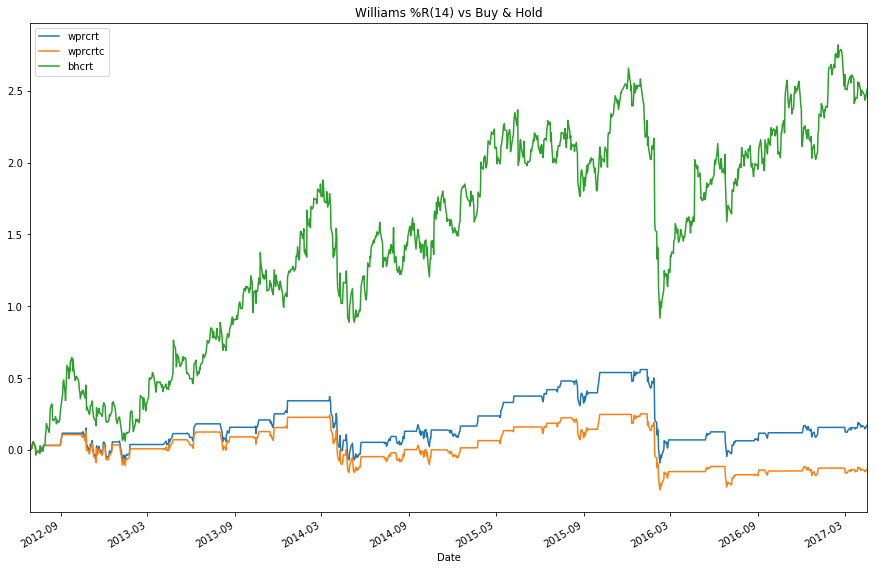

In [187]:
# Cumulative Returns Calculation
aapl['wprcrt'] = np.cumprod(aapl['wprdrt']+1)-1
aapl['wprcrtc'] = np.cumprod(aapl['wprdrtc']+1)-1
aapl['bhcrt'] = np.cumprod(aapl['bhdrt']+1)-1

# Cumulative Returns Chart
aapl.plot(y=['wprcrt', 'wprcrtc', 'bhcrt'])
plt.title('Williams %R(14) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

In [188]:
# Annualized Returns
wpryrt = aapl.ix[251, 'wprcrt']
wpryrtc = aapl.ix[251, 'wprcrtc']
bhyrt = aapl.ix[251, 'bhcrt']

# Annualized Standard Deviation
wprstd = np.std(aapl['wprdrt'])*np.sqrt(252)
wprstdc = np.std(aapl['wprdrtc'])*np.sqrt(252)
bhstd = np.std(aapl['bhdrt'])*np.sqrt(252)

# Annualized Sharpe Ratio
wprsr = wpryrt/wprstd
wprsrc = wpryrtc/wprstdc
bhsr = bhyrt/bhstd

In [189]:
# Summary Results Data Table
data = [{'0': '', '1': '%R(14)', '2': '%R(14)TC', '3': 'B&H'},
        {'0': 'Annualized Return', '1': wpryrt, '2': wpryrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': wprstd, '2': wprstdc, '3': bhstd},
        {'0': 'Annualized Sharpe Ratio (Rf=0%)', '1': wprsr, '2': wprsrc, '3': bhsr}]
table = pd.DataFrame(data)
print(aapl)
print(table)

                 Open       High        Low      Close    Volume  Adj Close  \
Date                                                                          
2012-06-29  23.750000  24.750000  22.830000  24.600000  10922400  24.600000   
2012-07-02  24.750000  25.200001  24.100000  24.770000    656700  24.770000   
2012-07-03  24.850000  25.320000  24.600000  25.309999    401100  25.309999   
2012-07-05  25.500000  26.260000  25.139999  25.959999    541000  25.959999   
2012-07-06  25.750000  26.120001  25.100000  25.840000    355100  25.840000   
2012-07-09  25.959999  26.299999  25.180000  25.270000    152400  25.270000   
2012-07-10  25.219999  25.690001  25.049999  25.049999    304000  25.049999   
2012-07-11  25.020000  25.350000  23.490000  23.740000    296500  23.740000   
2012-07-12  23.299999  24.469999  22.620001  24.080000    325500  24.080000   
2012-07-13  24.690001  24.920000  23.980000  24.180000     89100  24.180000   
2012-07-16  24.080000  24.559999  23.799999  24.3799

In [190]:
# SMA and CCI

In [191]:
# Without Trading Commissions
aapl['ccismadrt'] = ((aapl['Close']/aapl['Close'].shift(1))-1)*aapl['ccismastr']
aapl.ix[0, 'ccismadrt'] = 0

In [192]:
# With Trading Commissions (1% Per Trade)
aapl['ccismastr(-1)'] = aapl['ccismastr'].shift(1)
aapl['ccismatc'] = aapl['ccismasig']
ccismatc = 0
for i, r in enumerate(aapl.iterrows()):
    if (r[1]['ccismasig'] == 1 or r[1]['ccismasig'] == -1) and r[1]['ccismastr'] != r[1]['ccismastr(-1)']:
        ccismatc = 0.01
    else:
        ccismatc = 0.00
    aapl.ix[i, 'ccismatc'] = ccismatc
    
aapl['ccismadrtc'] = (((aapl['Close']/aapl['Close'].shift(1))-1)-aapl['ccismatc'])*aapl['ccismastr']
aapl.ix[0, 'ccismadrtc'] = 0

In [193]:
# Buy and Hold Strategy
aapl['bhdrt'] = (aapl['Close']/aapl['Close'].shift(1))-1
aapl.ix[0, 'bhdrt'] = 0

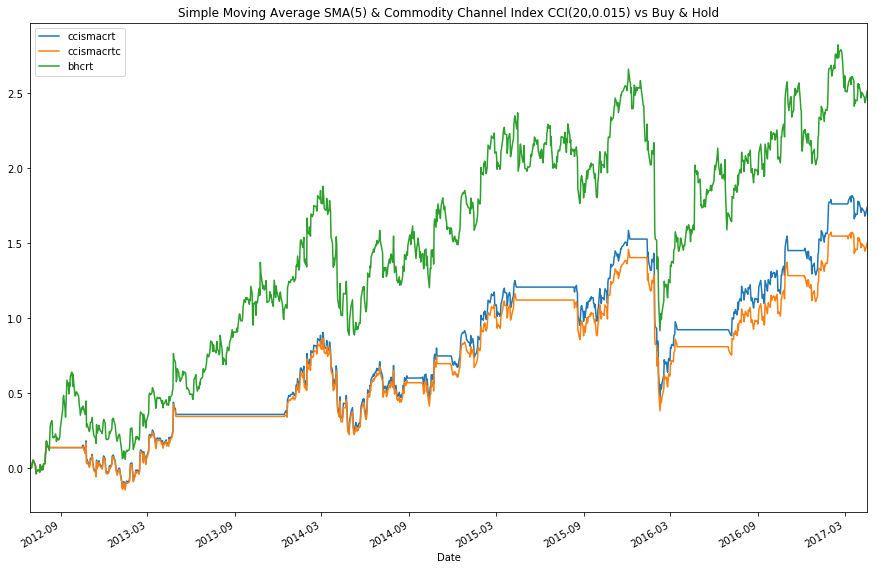

In [194]:
# Cumulative Returns Calculation
aapl['ccismacrt'] = np.cumprod(aapl['ccismadrt']+1)-1
aapl['ccismacrtc'] = np.cumprod(aapl['ccismadrtc']+1)-1
aapl['bhcrt'] = np.cumprod(aapl['bhdrt']+1)-1

# Cumulative Returns Chart
aapl.plot(y=['ccismacrt', 'ccismacrtc', 'bhcrt'])
plt.title('Simple Moving Average SMA(5) & Commodity Channel Index CCI(20,0.015) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

In [195]:
# Annualized Returns
ccismayrt = aapl.ix[251, 'ccismacrt']
ccismayrtc = aapl.ix[251, 'ccismacrtc']
bhyrt = aapl.ix[251, 'bhcrt']

# Annualized Standard Deviation
ccismastd = np.std(aapl['ccismadrt'])*np.sqrt(252)
ccismastdc = np.std(aapl['ccismadrtc'])*np.sqrt(252)
bhstd = np.std(aapl['bhdrt'])*np.sqrt(252)

# Annualized Sharpe Ratio
ccismasr = ccismayrt/ccismastd
ccismasrc = ccismayrtc/ccismastdc
bhsr = bhyrt/bhstd

In [196]:
# Summary Results Data Table
data = [{'0': '', '1': 'SMA(5) &', '2': 'SMA(5) &', '3': 'B&H'},
        {'0': '', '1': 'CCI(20,0.015)', '2': 'CCI(20,0.015)TC', '3': ''},
        {'0': 'Annualized Return', '1': ccismayrt, '2': ccismayrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': ccismastd, '2': ccismastdc, '3': bhstd},
        {'0': 'Annualized: Sharpe Ratio (Rf=0%)', '1': ccismasr, '2': ccismasrc, '3': bhsr}]
table = pd.DataFrame(data)
print(aapl)
print(table)

                 Open       High        Low      Close    Volume  Adj Close  \
Date                                                                          
2012-06-29  23.750000  24.750000  22.830000  24.600000  10922400  24.600000   
2012-07-02  24.750000  25.200001  24.100000  24.770000    656700  24.770000   
2012-07-03  24.850000  25.320000  24.600000  25.309999    401100  25.309999   
2012-07-05  25.500000  26.260000  25.139999  25.959999    541000  25.959999   
2012-07-06  25.750000  26.120001  25.100000  25.840000    355100  25.840000   
2012-07-09  25.959999  26.299999  25.180000  25.270000    152400  25.270000   
2012-07-10  25.219999  25.690001  25.049999  25.049999    304000  25.049999   
2012-07-11  25.020000  25.350000  23.490000  23.740000    296500  23.740000   
2012-07-12  23.299999  24.469999  22.620001  24.080000    325500  24.080000   
2012-07-13  24.690001  24.920000  23.980000  24.180000     89100  24.180000   
2012-07-16  24.080000  24.559999  23.799999  24.3799

In [197]:
#SMA and ROC

In [198]:
# Price and Bands Crossover Strategy Without Trading Commissions
aapl['rocsmadrt'] = ((aapl['Close']/aapl['Close'].shift(1))-1)*aapl['rocsmastr']
aapl.ix[0, 'rocsmadrt'] = 0

In [199]:
# Price and Bands Crossover Strategy With Trading Commissions (1% Per Trade)
aapl['rocsmastr(-1)'] = aapl['rocsmastr'].shift(1)
aapl['rocsmatc'] = aapl['rocsmasig']
rocsmatc = 0
for i, r in enumerate(aapl.iterrows()):
    if (r[1]['rocsmasig'] == 1 or r[1]['rocsmasig'] == -1) and r[1]['rocsmastr'] != r[1]['rocsmastr(-1)']:
        rocsmatc = 0.01
    else:
        rocsmatc = 0.00
    aapl.ix[i, 'rocsmatc'] = rocsmatc
    
aapl['rocsmadrtc'] = (((aapl['Close']/aapl['Close'].shift(1))-1)-aapl['rocsmatc'])*aapl['rocsmastr']
aapl.ix[0, 'rocsmadrtc'] = 0

In [200]:
# Buy and Hold Strategy
aapl['bhdrt'] = (aapl['Close']/aapl['Close'].shift(1))-1
aapl.ix[0, 'bhdrt'] = 0

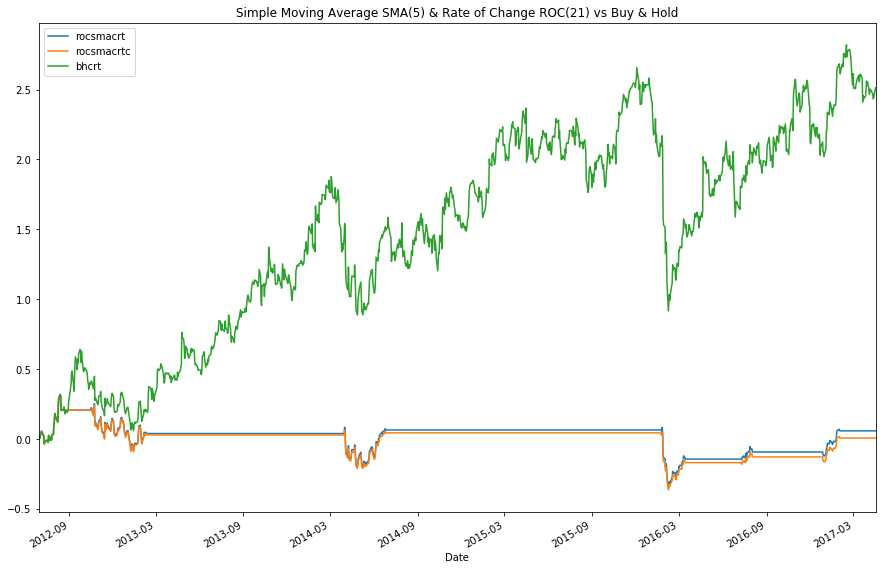

In [201]:
# Cumulative Returns Calculation
aapl['rocsmacrt'] = np.cumprod(aapl['rocsmadrt']+1)-1
aapl['rocsmacrtc'] = np.cumprod(aapl['rocsmadrtc']+1)-1
aapl['bhcrt'] = np.cumprod(aapl['bhdrt']+1)-1

# Cumulative Returns Chart
aapl.plot(y=['rocsmacrt', 'rocsmacrtc', 'bhcrt'])
plt.title('Simple Moving Average SMA(5) & Rate of Change ROC(21) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

In [202]:
# Annualized Returns
rocsmayrt = aapl.ix[251, 'rocsmacrt']
rocsmayrtc = aapl.ix[251, 'rocsmacrtc']
bhyrt = aapl.ix[251, 'bhcrt']

# Annualized Standard Deviation
rocsmastd = np.std(aapl['rocsmadrt'])*np.sqrt(252)
rocsmastdc = np.std(aapl['rocsmadrtc'])*np.sqrt(252)
bhstd = np.std(aapl['bhdrt'])*np.sqrt(252)

# Annualized Sharpe Ratio
rocsmasr = rocsmayrt/rocsmastd
rocsmasrc = rocsmayrtc/rocsmastdc
bhsr = bhyrt/bhstd

In [203]:
# Summary Results Data Table
data = [{'0': '', '1': 'SMA(5) &', '2': 'SMA(5) &', '3': 'B&H'},
        {'0': '', '1': 'ROC(21)', '2': 'ROC(21)TC', '3': ''},
        {'0': 'Annualized Return', '1': rocsmayrt, '2': rocsmayrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': rocsmastd, '2': rocsmastdc, '3': bhstd},
        {'0': 'Annualized: Sharpe Ratio (Rf=0%)', '1': rocsmasr, '2': rocsmasrc, '3': bhsr}]
table = pd.DataFrame(data)
print(aapl)
print(table)

                 Open       High        Low      Close    Volume  Adj Close  \
Date                                                                          
2012-06-29  23.750000  24.750000  22.830000  24.600000  10922400  24.600000   
2012-07-02  24.750000  25.200001  24.100000  24.770000    656700  24.770000   
2012-07-03  24.850000  25.320000  24.600000  25.309999    401100  25.309999   
2012-07-05  25.500000  26.260000  25.139999  25.959999    541000  25.959999   
2012-07-06  25.750000  26.120001  25.100000  25.840000    355100  25.840000   
2012-07-09  25.959999  26.299999  25.180000  25.270000    152400  25.270000   
2012-07-10  25.219999  25.690001  25.049999  25.049999    304000  25.049999   
2012-07-11  25.020000  25.350000  23.490000  23.740000    296500  23.740000   
2012-07-12  23.299999  24.469999  22.620001  24.080000    325500  24.080000   
2012-07-13  24.690001  24.920000  23.980000  24.180000     89100  24.180000   
2012-07-16  24.080000  24.559999  23.799999  24.3799

In [204]:
#SMA and RSI

In [205]:
# Without Trading Commissions
aapl['rsismadrt'] = ((aapl['Close']/aapl['Close'].shift(1))-1)*aapl['rsismastr']
aapl.ix[0, 'rsismadrt'] = 0

In [206]:
# With Trading Commissions (1% Per Trade)
aapl['rsismastr(-1)'] = aapl['rsismastr'].shift(1)
aapl['rsismatc'] = aapl['rsismasig']
rsismatc = 0
for i, r in enumerate(aapl.iterrows()):
    if (r[1]['rsismasig'] == 1 or r[1]['rsismasig'] == -1) and r[1]['rsismastr'] != r[1]['rsismastr(-1)']:
        rsismatc = 0.01
    else:
        rsismatc = 0.00
    aapl.ix[i, 'rsismatc'] = rsismatc
    
aapl['rsismadrtc'] = (((aapl['Close']/aapl['Close'].shift(1))-1)-aapl['rsismatc'])*aapl['rsismastr']
aapl.ix[0, 'rsismadrtc'] = 0

In [207]:
# Buy and Hold Strategy
aapl['bhdrt'] = (aapl['Close']/aapl['Close'].shift(1))-1
aapl.ix[0, 'bhdrt'] = 0

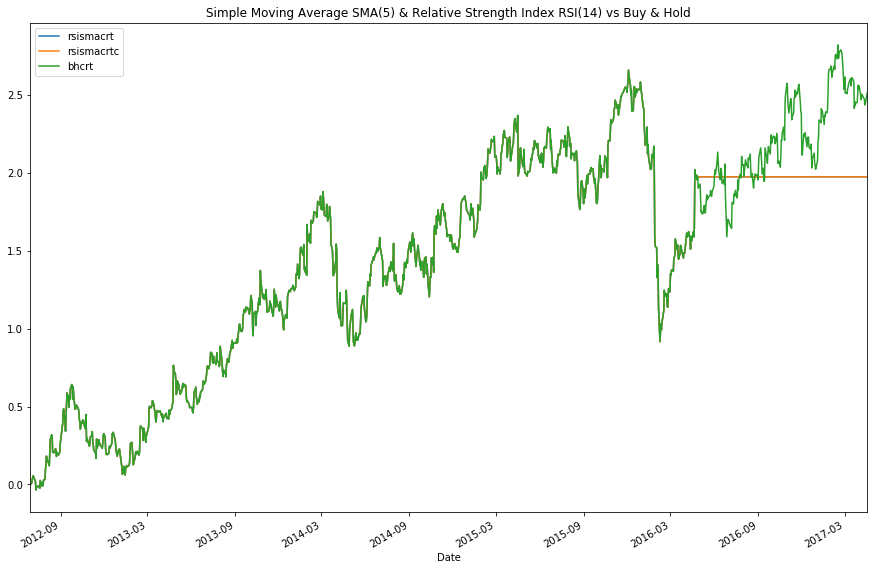

In [208]:
# Cumulative Returns Calculation
aapl['rsismacrt'] = np.cumprod(aapl['rsismadrt']+1)-1
aapl['rsismacrtc'] = np.cumprod(aapl['rsismadrtc']+1)-1
aapl['bhcrt'] = np.cumprod(aapl['bhdrt']+1)-1

# Cumulative Returns Chart
aapl.plot(y=['rsismacrt', 'rsismacrtc', 'bhcrt'])
plt.title('Simple Moving Average SMA(5) & Relative Strength Index RSI(14) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

In [209]:
# Annualized Returns
rsismayrt = aapl.ix[251, 'rsismacrt']
rsismayrtc = aapl.ix[251, 'rsismacrtc']
bhyrt = aapl.ix[251, 'bhcrt']

# Annualized Standard Deviation
rsismastd = np.std(aapl['rsismadrt'])*np.sqrt(252)
rsismastdc = np.std(aapl['rsismadrtc'])*np.sqrt(252)
bhstd = np.std(aapl['bhdrt'])*np.sqrt(252)

# Annualized Sharpe Ratio
rsismasr = rsismayrt/rsismastd
rsismasrc = rsismayrtc/rsismastdc
bhsr = bhyrt/bhstd

In [210]:
# Summary Results Data Table
data = [{'0': '', '1': 'SMA(5) &', '2': 'SMA(5) &', '3': 'B&H'},
        {'0': '', '1': 'RSI(14)', '2': 'RSI(14)TC', '3': ''},
        {'0': 'Annualized Return', '1': rsismayrt, '2': rsismayrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': rsismastd, '2': rsismastdc, '3': bhstd},
        {'0': 'Annualized: Sharpe Ratio (Rf=0%)', '1': rsismasr, '2': rsismasrc, '3': bhsr}]
table = pd.DataFrame(data)
print(aapl)
print(table)

                 Open       High        Low      Close    Volume  Adj Close  \
Date                                                                          
2012-06-29  23.750000  24.750000  22.830000  24.600000  10922400  24.600000   
2012-07-02  24.750000  25.200001  24.100000  24.770000    656700  24.770000   
2012-07-03  24.850000  25.320000  24.600000  25.309999    401100  25.309999   
2012-07-05  25.500000  26.260000  25.139999  25.959999    541000  25.959999   
2012-07-06  25.750000  26.120001  25.100000  25.840000    355100  25.840000   
2012-07-09  25.959999  26.299999  25.180000  25.270000    152400  25.270000   
2012-07-10  25.219999  25.690001  25.049999  25.049999    304000  25.049999   
2012-07-11  25.020000  25.350000  23.490000  23.740000    296500  23.740000   
2012-07-12  23.299999  24.469999  22.620001  24.080000    325500  24.080000   
2012-07-13  24.690001  24.920000  23.980000  24.180000     89100  24.180000   
2012-07-16  24.080000  24.559999  23.799999  24.3799

In [211]:
#SMA and STO

In [212]:
# Without Trading Commissions
aapl['stosmadrt'] = ((aapl['Close']/aapl['Close'].shift(1))-1)*aapl['stosmastr']
aapl.ix[0, 'stosmadrt'] = 0

In [213]:
# With Trading Commissions (1% Per Trade)
aapl['stosmastr(-1)'] = aapl['stosmastr'].shift(1)
aapl['stosmatc'] = aapl['stosmasig']
stosmatc = 0
for i, r in enumerate(aapl.iterrows()):
    if (r[1]['stosmasig'] == 1 or r[1]['stosmasig'] == -1) and r[1]['stosmastr'] != r[1]['stosmastr(-1)']:
        stosmatc = 0.01
    else:
        stosmatc = 0.00
    aapl.ix[i, 'stosmatc'] = stosmatc
    
aapl['stosmadrtc'] = (((aapl['Close']/aapl['Close'].shift(1))-1)-aapl['stosmatc'])*aapl['stosmastr']
aapl.ix[0, 'stosmadrtc'] = 0

In [214]:
# Buy and Hold Strategy
aapl['bhdrt'] = (aapl['Close']/aapl['Close'].shift(1))-1
aapl.ix[0, 'bhdrt'] = 0

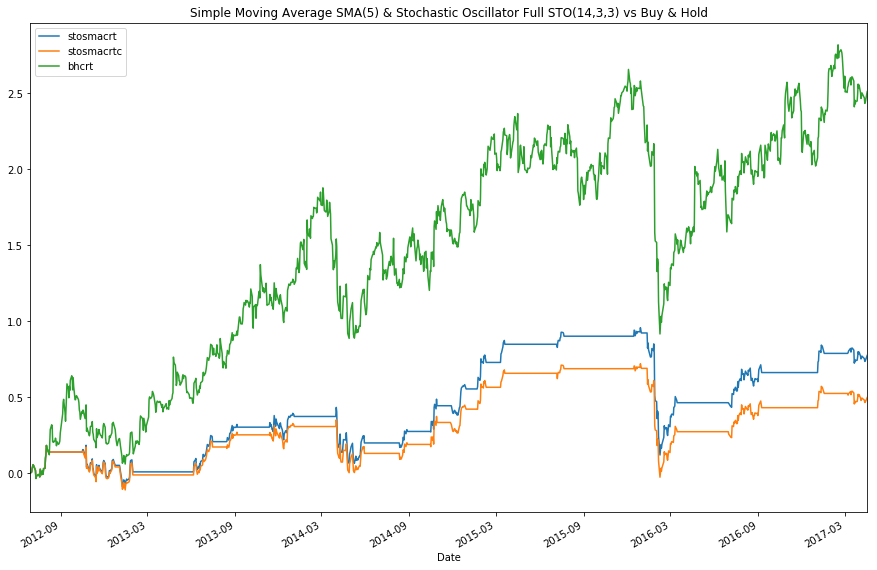

In [215]:
# Cumulative Returns Calculation
aapl['stosmacrt'] = np.cumprod(aapl['stosmadrt']+1)-1
aapl['stosmacrtc'] = np.cumprod(aapl['stosmadrtc']+1)-1
aapl['bhcrt'] = np.cumprod(aapl['bhdrt']+1)-1

# Cumulative Returns Chart
aapl.plot(y=['stosmacrt', 'stosmacrtc', 'bhcrt'])
plt.title('Simple Moving Average SMA(5) & Stochastic Oscillator Full STO(14,3,3) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

In [216]:
# Annualized Returns
stosmayrt = aapl.ix[251, 'stosmacrt']
stosmayrtc = aapl.ix[251, 'stosmacrtc']
bhyrt = aapl.ix[251, 'bhcrt']

# Annualized Standard Deviation
stosmastd = np.std(aapl['stosmadrt'])*np.sqrt(252)
stosmastdc = np.std(aapl['stosmadrtc'])*np.sqrt(252)
bhstd = np.std(aapl['bhdrt'])*np.sqrt(252)

# Annualized Sharpe Ratio
stosmasr = stosmayrt/stosmastd
stosmasrc = stosmayrtc/stosmastdc
bhsr = bhyrt/bhstd

In [217]:
# Summary Results Data Table
data = [{'0': '', '1': 'SMA(5) &', '2': 'SMA(5) &', '3': 'B&H'},
        {'0': '', '1': 'STO(14,3,3)', '2': 'STO(14,3,3)TC', '3': ''},
        {'0': 'Annualized Return', '1': stosmayrt, '2': stosmayrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': stosmastd, '2': stosmastdc, '3': bhstd},
        {'0': 'Annualized: Sharpe Ratio (Rf=0%)', '1': stosmasr, '2': stosmasrc, '3': bhsr}]
table = pd.DataFrame(data)
print(aapl)
print(table)

                 Open       High        Low      Close    Volume  Adj Close  \
Date                                                                          
2012-06-29  23.750000  24.750000  22.830000  24.600000  10922400  24.600000   
2012-07-02  24.750000  25.200001  24.100000  24.770000    656700  24.770000   
2012-07-03  24.850000  25.320000  24.600000  25.309999    401100  25.309999   
2012-07-05  25.500000  26.260000  25.139999  25.959999    541000  25.959999   
2012-07-06  25.750000  26.120001  25.100000  25.840000    355100  25.840000   
2012-07-09  25.959999  26.299999  25.180000  25.270000    152400  25.270000   
2012-07-10  25.219999  25.690001  25.049999  25.049999    304000  25.049999   
2012-07-11  25.020000  25.350000  23.490000  23.740000    296500  23.740000   
2012-07-12  23.299999  24.469999  22.620001  24.080000    325500  24.080000   
2012-07-13  24.690001  24.920000  23.980000  24.180000     89100  24.180000   
2012-07-16  24.080000  24.559999  23.799999  24.3799

In [218]:
# SMA and %R

In [219]:
# Without Trading Commissions
aapl['wprsmadrt'] = ((aapl['Close']/aapl['Close'].shift(1))-1)*aapl['wprsmastr']
aapl.ix[0, 'wprsmadrt'] = 0

In [220]:
# With Trading Commissions (1% Per Trade)
aapl['wprsmastr(-1)'] = aapl['wprsmastr'].shift(1)
aapl['wprsmatc'] = aapl['wprsmasig']
wprsmatc = 0
for i, r in enumerate(aapl.iterrows()):
    if (r[1]['wprsmasig'] == 1 or r[1]['wprsmasig'] == -1) and r[1]['wprsmastr'] != r[1]['wprsmastr(-1)']:
        wprsmatc = 0.01
    else:
        wprsmatc = 0.00
    aapl.ix[i, 'wprsmatc'] = wprsmatc

aapl['wprsmadrtc'] = (((aapl['Close']/aapl['Close'].shift(1))-1)-aapl['wprsmatc'])*aapl['wprsmastr']
aapl.ix[0, 'wprsmadrtc'] = 0

In [221]:
# Buy and Hold Strategy
aapl['bhdrt'] = (aapl['Close']/aapl['Close'].shift(1))-1
aapl.ix[0, 'bhdrt'] = 0

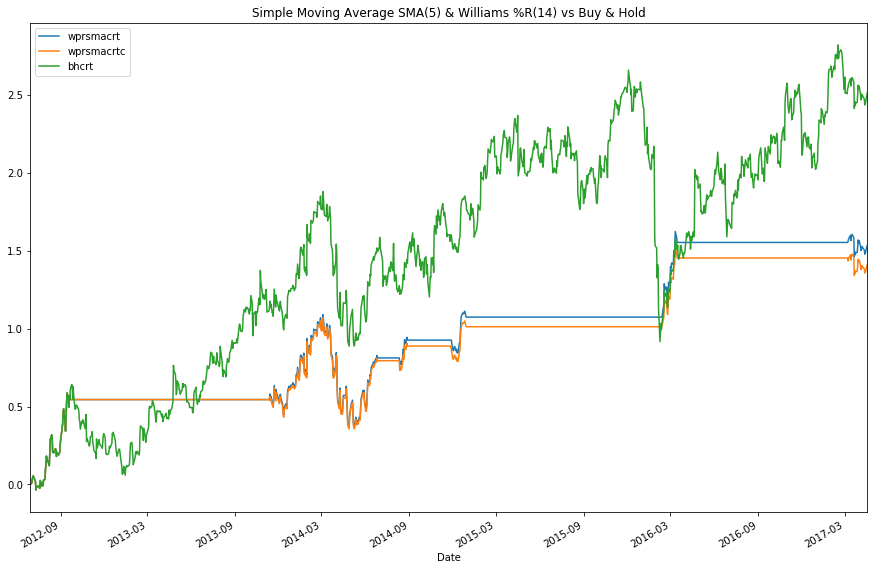

In [222]:
# Cumulative Returns Calculation
aapl['wprsmacrt'] = np.cumprod(aapl['wprsmadrt']+1)-1
aapl['wprsmacrtc'] = np.cumprod(aapl['wprsmadrtc']+1)-1
aapl['bhcrt'] = np.cumprod(aapl['bhdrt']+1)-1

# Cumulative Returns Chart
aapl.plot(y=['wprsmacrt', 'wprsmacrtc', 'bhcrt'])
plt.title('Simple Moving Average SMA(5) & Williams %R(14) vs Buy & Hold')
plt.legend(loc='upper left')
plt.show()

In [223]:
# Annualized Returns
wprsmayrt = aapl.ix[251, 'wprsmacrt']
wprsmayrtc = aapl.ix[251, 'wprsmacrtc']
bhyrt = aapl.ix[251, 'bhcrt']

# Annualized Standard Deviation
wprsmastd = np.std(aapl['wprsmadrt'])*np.sqrt(252)
wprsmastdc = np.std(aapl['wprsmadrtc'])*np.sqrt(252)
bhstd = np.std(aapl['bhdrt'])*np.sqrt(252)

# Annualized Sharpe Ratio
wprsmasr = wprsmayrt/wprsmastd
wprsmasrc = wprsmayrtc/wprsmastdc
bhsr = bhyrt/bhstd

In [224]:
# Summary Results Data Table
data = [{'0': '', '1': 'SMA(5) &', '2': 'SMA(5) &', '3': 'B&H'},
        {'0': '', '1': '%R(14)', '2': '%R(14)TC', '3': ''},
        {'0': 'Annualized Return', '1': wprsmayrt, '2': wprsmayrtc, '3': bhyrt},
        {'0': 'Annualized Standard Deviation', '1': wprsmastd, '2': wprsmastdc, '3': bhstd},
        {'0': 'Annualized: Sharpe Ratio (Rf=0%)', '1': wprsmasr, '2': wprsmasrc, '3': bhsr}]
table = pd.DataFrame(data)
print(aapl)
print(table)

                 Open       High        Low      Close    Volume  Adj Close  \
Date                                                                          
2012-06-29  23.750000  24.750000  22.830000  24.600000  10922400  24.600000   
2012-07-02  24.750000  25.200001  24.100000  24.770000    656700  24.770000   
2012-07-03  24.850000  25.320000  24.600000  25.309999    401100  25.309999   
2012-07-05  25.500000  26.260000  25.139999  25.959999    541000  25.959999   
2012-07-06  25.750000  26.120001  25.100000  25.840000    355100  25.840000   
2012-07-09  25.959999  26.299999  25.180000  25.270000    152400  25.270000   
2012-07-10  25.219999  25.690001  25.049999  25.049999    304000  25.049999   
2012-07-11  25.020000  25.350000  23.490000  23.740000    296500  23.740000   
2012-07-12  23.299999  24.469999  22.620001  24.080000    325500  24.080000   
2012-07-13  24.690001  24.920000  23.980000  24.180000     89100  24.180000   
2012-07-16  24.080000  24.559999  23.799999  24.3799